# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> Data Science 2: Advanced Topics in Data Science 
# **Final Project**
## **Topic H: Dynamics of Disease Transmision and Human Behavior**
### **Spring 2022**
### **GROUP 10:** Jaqueline Garcia-Yi, Rafael Hernandez, Hugo Munoz Sanchez, and Kerem Atalay<br/><br/>


<hr style="height:2pt">

<a id="contents"></a>

# TABLE OF CONTENTS
### [I. Background and introduction](#background)
### [II. Research question](#question)
### [III. Exploratory data analysis: trend graphs, correlations, and cluster analysis](#EDA)
### [IV. Model results and discussions](#data_analysis)
### [4.1. Preliminary: import commands, verify version of Tensorflow, and check GPU functioning](#preliminary)
### [4.2. Read csv files](#readfiles)
### [4.3. Merge files and clean data (handling of NAs)](#cleandata)
### [4.4. Train-test split and normalization (per State)](#dataset_gen)
### [4.5. Time series baseline models](#baseline)
### &emsp;&nbsp;[4.5.1 New York](#baseline_ny)
### &emsp;&nbsp;[4.5.2 California](#baseline_cal)
### [4.6. RNN models](#rnn_models)
### &emsp;&nbsp;[4.6.1 New York](#rnn_ny)
### &emsp;&emsp;&emsp;&nbsp;[a) Results of one layer RNN model](#rnn_model_ny)
### &emsp;&emsp;&emsp;&nbsp;[b) Results of multi- layer RNN model](#rnn_multi-model_ny)
### &emsp;&nbsp;[4.6.2 California](#rnn_cal)
### &emsp;&emsp;&emsp;&nbsp;[a) Results of one layer RNN model](#rnn_model_cal)
### &emsp;&emsp;&emsp;&nbsp;[b) Results of multi- layer RNN model](#rnn_multi-model_cal)
### [4.7. LSTM models](#rnn_models)
### &emsp;&nbsp;[4.7.1 New York](#rnn_ny)
### &emsp;&emsp;&emsp;&nbsp;[a) Results of one layer LSTM model](#lstm_model_ny)
### &emsp;&emsp;&emsp;&nbsp;[b) Results of multi- layer LSTM model](#lstm_multi-model_ny)
### &emsp;&emsp;&emsp;&nbsp;[c) Results of multi- layer LSTM model using time steps](#lstm_multi-timel_ny)
### &emsp;&nbsp;[4.7.2 California](#lstm_cal)
### &emsp;&emsp;&emsp;&nbsp;[a) Results of one layer LSTM model](#lstm_model_cal)
### &emsp;&emsp;&emsp;&nbsp;[b) Results of multi- layer LSTM model](#lstm_multi-model_cal)
### &emsp;&emsp;&emsp;&nbsp;[c) Results of multi- layer LSTM model using time steps](#lstm_multi-time_cal)
### [V. Conclusions and way forward](#conclusions)
### [VI. References](#references)

<br>
<br>
<br>

<hr style="height:2pt">

# I. Background and Introduction<a name="background"></a>

[Return to contents](#contents)

\* Note: numbers in squared brackets in the text of the notebook indicate the reference (the full citations are in the Section VI Reference of this notebook)

Emerging infectious diseases pose a threat to humanity. Existing mechanisms for infectious disease surveillance and early response systems are not refined enough to allow governmental authorities to respond in timely fashion to outbreaks and minimize their potential impacts [1]. Over the last decade, innovative approaches have been increasingly used to predict outbreaks, including exploiting information from internet and search engines, but further research is still needed to refine those models and outbreak predictions [2]. Predicting outbreaks in a reliable fashion would allow Governments, other authorities, and the population in general to take early control measures to avoid exposure and reduce the number of people getting infected. The ability to accurately forecast outbreaks has the potential to save several human lives. Therefore, the aim of our project is to contribute to the advancement of an outbreak prediction system by using deep learning models (such as RNN and LSTM models) to forecast COVID-19 cases using mainly digital stream data (i.e., google searches on COVID-19 related and not directly related terms). <br>

#II. Research question<a name="question"></a>

[Return to contents](#contents)


Our research question is:<br><br>
Could the outbreak of infectious diseases (such as COVID-19) be accurately predicted by deep learning models (e.g., RNN and LSTM models) using mainly digital stream data?
<br>
<br>

# III. Exploratory data analysis: trend graphs, correlations, and cluster analysis<a name="EDA"></a>

[Return to contents](#contents)




For the exploratory data analysis (EDA), see the auxiliary jupyter notebook 1. The EDA includes trend graphs, correlations and cluster analysis results. The trend graphs were separated in four groups of predictors to easy their visualization. These groups were: (a) number of cases, deaths and hospitalizations due to COVID-19; (b) number of google searches related to COVID-19; (c) number of COVID-19 cases in other states; and (d) number of google searches not directly related to COVID-19.
<br>
<br>

# IV. Model results and discussions<a name="data analysis"></a>

[Return to contents](#contents)


Our results include three types of models: (a) time series baseline models, such as simple moving average models and auto regressive moving average (ARMA) models; (b) RNN models, specifically one-layer and multi-layer RNN models; and (c) LSTM models, such as one-layer, multi-layer, two-layer using time steps, and multi-layer using time steps.<br>  
In this notebook, we present the results of two States: New York and California. We selected these States because they are two of the largest States (i.e., population size) but located at opposite coasts of US (New York in the Atlantic and California in the Pacific) with different climatic conditions. Climate and humidity conditions influence the transmision of infection disseases, such as COVID-19 [1]. Furthermore, both States received among the lowest rankings of all the States on how they handled the COVID-19 crisis [2]. Therefore, reliable early warning systems could significantly help these two States to save lives and avoid unnecessary lockdowns and economic turmoil at the same time. <br>   
The auxiliary notebook 2 includes a drop-down menu (a widget) for selecting and running the model results for any of the 50 States in US. The drop-down menu is located inmediately after sub-section 4.4 in the auxiliary notebook.<br>  


## 4.1. Preliminary: import commands, verify version of Tensorflow, and check GPU functioning<a name="preliminary"></a>

[Return to contents](#contents)


We formatted the notebook according to the CSCI-109B style. We worked in a shared Colab jupyter notebook. We avoid loading the 50 States before starting each session by creating a Git-Hub repository and running a command to opening the repository each time we used the notebook. On occasions, the GPU was not active, and the code ran slowly. However, we could not quickly find any other way to collaborate as a team (that were also free of charge, if possible). The versions of tensorflow and keras used for running the notebook were 2.8. <br>  

In [ ]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/"
    "content/styles/cs109.css"
).text
HTML(styles)

In [ ]:
! cd $HOME
! git clone https://github.com/rafah1/COVID-data/

Cloning into 'COVID-data'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 63 (delta 0), reused 5 (delta 0), pack-reused 58
Unpacking objects: 100% (63/63), done.


In [ ]:
pip install --upgrade gap-stat

In [ ]:
# Import necessary libraries
import os
import time
import datetime
import requests
import glob
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats
%matplotlib inline

# Tensorflow
import tensorflow as tf
from tensorflow.python.keras import backend as K

# Keras
from keras.preprocessing.sequence import TimeseriesGenerator

# sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error 
from sklearn.metrics import precision_score , recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import manifold
from sklearn.impute import SimpleImputer, KNNImputer

#Cluster
import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
from gap_statistic import OptimalK

#Statistical models
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA, ARIMA

#Date data
from datetime import datetime

#Numpy
from numpy.ma.core import reshape

#Table
from tabulate import tabulate

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Verify setup
print("tensorflow version", tf.__version__)
print("keras version", tf.keras.__version__)
print("Eager Execution Enabled:", tf.executing_eagerly())

# Get the number of replicas 
strategy = tf.distribute.MirroredStrategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

devices = tf.config.experimental.get_visible_devices()
print("Devices:", devices)
print(tf.config.experimental.list_logical_devices('GPU'))

print("GPU Available: ", tf.config.list_physical_devices('GPU'))
print("All Physical Devices", tf.config.list_physical_devices())

AUTOTUNE = tf.data.experimental.AUTOTUNE



tensorflow version 2.8.0
keras version 2.8.0
Eager Execution Enabled: True
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Number of replicas: 1
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[]
GPU Available:  []
All Physical Devices [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [ ]:
#Check GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



<hr style="height:2pt">

## 4.2. Read csv files<a name="readfiles"></a>


[Return to contents](#contents)  

We loaded the 50 CSV files (one file per State) from the Git-Hub to the Notebook by using the glob() method. The glob() python package retrieves files matching a specific pattern (for instance, “.csv”). Then, we looped and read each of the files using the pandas.read_csv() method [1]. 

In [ ]:
# Increase number of displayed columns
pd.set_option('display.max_columns', 700)
  
# Use glob to read the csv files from a folder
path = os.getcwd()
#csv_files = glob.glob(os.path.join("state_level_data", "*.csv"))
csv_files = glob.glob(os.path.join("./COVID-data/state_level_data", "*.csv"))
csv_files
  
# Read csv files
file_names=[]
list_files=[]
for f in csv_files:      
    # Print name of file
    name=f.split("/")[-1]
    name=name.split(".")[0]
    #print(f'\033[1mFILE NAME: {name} \033[0m')  
    file_names.append(name)
    # read the csv files
    df = pd.read_csv(f)
    list_files.append(df)
    ####
    ## Delete the "#" below to print shape, description, data type and NAs of each individual csv file
    ####
    #print(f'\nShape: {df.shape}')
    #print('\nContent:')
    #display(df.head())
    #print('\nDescription:')
    #display(df.describe())
    #print('\nData type:')
    #display(np.transpose(pd.DataFrame(df.dtypes)))
    #print("\nNumber of NAs per column:")
    #display(np.transpose(pd.DataFrame(df.isnull().sum())))
    #print("\n")

#Display one state
print("The shape of the file of one state is", list_files[0].shape)
print("\nThe first rows of the file of one state are:")
display(list_files[0].head())


The shape of the file of one state is (744, 499)

The first rows of the file of one state are:


,date,JHU_cases,JHU_deaths,JHU_hospitalizations,up2date,gt_after covid vaccine,gt_side effects of vaccine,gt_effects of covid vaccine,gt_covid,gt_how long does covid last,gt_anosmia,gt_loss smell,gt_covid-19,gt_loss taste,gt_loss of smell,gt_chest pain,gt_covid symptoms,gt_sars-cov 2,gt_chest tightness,gt_covid nhs,gt_quarantine,gt_covid-19 who,gt_sars-cov-2,gt_feeling exhausted,gt_nose bleed,gt_feeling tired,gt_joints aching,gt_fever,gt2_Abdominal obesity,gt2_Abdominal pain,gt2_Acne,gt2_Actinic keratosis,gt2_Acute bronchitis,gt2_Adrenal crisis,gt2_Ageusia,gt2_Alcoholism,gt2_Allergic conjunctivitis,gt2_Allergy,gt2_Amblyopia,gt2_Amenorrhea,gt2_Amnesia,gt2_Anal fissure,gt2_Anaphylaxis,gt2_Anemia,gt2_Angina pectoris,gt2_Angioedema,gt2_Angular cheilitis,gt2_Anosmia,gt2_Anxiety,gt2_Aphasia,gt2_Aphonia,gt2_Apnea,gt2_Arthralgia,gt2_Arthritis,gt2_Ascites,gt2_Asperger syndrome,gt2_Asphyxia,gt2_Asthma,gt2_Astigmatism,gt2_Ataxia,gt2_Atheroma,gt2_Attention deficit hyperactivity disorder,gt2_Auditory hallucination,gt2_Autoimmune disease,gt2_Avoidant personality disorder,gt2_Back pain,gt2_Bacterial vaginosis,gt2_Balance disorder,gt2_Beau's lines,gt2_Bell's palsy,gt2_Biliary colic,gt2_Binge eating,gt2_Bleeding,gt2_Bleeding on probing,gt2_Blepharospasm,gt2_Bloating,gt2_Blood in stool,gt2_Blurred vision,gt2_Blushing,gt2_Boil,gt2_Bone fracture,gt2_Bone tumor,gt2_Bowel obstruction,gt2_Bradycardia,gt2_Braxton Hicks contractions,gt2_Breakthrough bleeding,gt2_Breast pain,gt2_Bronchitis,gt2_Bruise,gt2_Bruxism,gt2_Bunion,gt2_Burn,gt2_Burning Chest Pain,gt2_Burning mouth syndrome,gt2_Candidiasis,gt2_Canker sore,gt2_Cardiac arrest,gt2_Carpal tunnel syndrome,gt2_Cataplexy,gt2_Cataract,gt2_Chancre,gt2_Cheilitis,gt2_Chest pain,gt2_Chills,gt2_Chorea,gt2_Chronic pain,gt2_Cirrhosis,gt2_Cleft lip and cleft palate,gt2_Clouding of consciousness,gt2_Cluster headache,gt2_Colitis,gt2_Coma,gt2_Common cold,gt2_Compulsive behavior,gt2_Compulsive hoarding,gt2_Confusion,gt2_Congenital heart defect,gt2_Conjunctivitis,gt2_Constipation,gt2_Convulsion,gt2_Cough,gt2_Crackles,gt2_Cramp,gt2_Crepitus,gt2_Croup,gt2_Cyanosis,gt2_Dandruff,gt2_Delayed onset muscle soreness,gt2_Dementia,gt2_Dentin hypersensitivity,gt2_Depersonalization,gt2_Depression,gt2_Dermatitis,gt2_Desquamation,gt2_Developmental disability,gt2_Diabetes,gt2_Diabetic ketoacidosis,gt2_Diarrhea,gt2_Dizziness,gt2_Dry eye syndrome,gt2_Dysautonomia,gt2_Dysgeusia,gt2_Dysmenorrhea,gt2_Dyspareunia,gt2_Dysphagia,gt2_Dysphoria,gt2_Dystonia,gt2_Dysuria,gt2_Ear pain,gt2_Eczema,gt2_Edema,gt2_Encephalitis,gt2_Encephalopathy,gt2_Epidermoid cyst,gt2_Epilepsy,gt2_Epiphora,gt2_Erectile dysfunction,gt2_Erythema,gt2_Erythema chronicum migrans,gt2_Esophagitis,gt2_Excessive daytime sleepiness,gt2_Eye pain,gt2_Eye strain,gt2_Facial nerve paralysis,gt2_Facial swelling,gt2_Fasciculation,gt2_Fatigue,gt2_Fatty liver disease,gt2_Fecal incontinence,gt2_Fever,gt2_Fibrillation,gt2_Fibrocystic breast changes,gt2_Fibromyalgia,gt2_Flatulence,gt2_Floater,gt2_Focal seizure,gt2_Folate deficiency,gt2_Food craving,gt2_Food intolerance,gt2_Frequent urination,gt2_Gastroesophageal reflux disease,gt2_Gastroparesis,gt2_Generalized anxiety disorder,gt2_Generalized tonic–clonic seizure,gt2_Genital wart,gt2_Gingival recession,gt2_Gingivitis,gt2_Globus pharyngis,gt2_Goitre,gt2_Gout,gt2_Grandiosity,gt2_Granuloma,gt2_Guilt,gt2_Hair loss,gt2_Halitosis,gt2_Hay fever,gt2_Headache,gt2_Heart arrhythmia,gt2_Heart murmur,gt2_Heartburn,gt2_Hematochezia,gt2_Hematoma,gt2_Hematuria,gt2_Hemolysis,gt2_Hemoptysis,gt2_Hemorrhoids,gt2_Hepatic encephalopathy,gt2_Hepatitis,gt2_Hepatotoxicity,gt2_Hiccup,gt2_Hip pain,gt2_Hives,gt2_Hot flash,gt2_Hydrocephalus,gt2_Hypercalcaemia,gt2_Hypercapnia,gt2_Hypercholesterolemia,gt2_Hyperemesis gravidarum,gt2_Hyperglycemia,gt2_Hyperkalemia,gt2_Hyperlipidemia,gt2_Hypermobility,gt2_Hyperpigmentation,gt2_Hypersomnia,gt2_Hypertension,gt2_Hyperthermia,gt2_Hyperthyroidism,gt2_Hypertriglyceridemia,gt2_Hypertrophy,gt2_Hyperventilation,gt2_Hypocalcaemi

## 4.3. Merge files and clean data (handling of NAs)<a name="cleandata"></a>


[Return to contents](#contents)  

After reading each of the 50 CSV files, we included a “State” column, which corresponded to the name of the State for each file. Then, we cleaned the data. We decided to keep negative values as the data reported by Google Trends are Z-scores, which can include negative values. For filling out the NAs, we evaluated different alternatives (replacing them by zero, mean values, and interpolation).   We decided not to replace NA by zeros. For instance, the number of COVID cases on 25 December 2021 is stated as NAs in California. It is unlikely there were zero cases during Christmas, but likely that there was not reporting that day due to the festivities. We also discarded using mean values to replace NAs, as trend graphs of the predictors with missing values showed abrupt changes when using them. So, we finally decided to use interpolation to replace NAs. We tried different interpolation methods: linear, spline (degrees 2 to 4) and polynomial (degrees 2 to 4). We selected linear based on a visual inspection of the trend graphs of the predictors with missing values (minimal abrupt changes in comparison to the other types of interpolation). After cleaning each file, we merged them in one large database to make all the data ready and easy to use for modelling.

In [ ]:
# Include state name as column in each csv file
n=0
for i in list_files:
    i["State_Name"]=file_names[n]
    n=n+1

# Print file before cleaning
print("\nNumber of NAs per column of the file of one State before cleaning:")
display(np.transpose(pd.DataFrame(list_files[0].isnull().sum())))

list_files_clean=[]
#Clean data 
for i in list_files:
    i.interpolate('index', limit_direction='both', inplace=True)
    list_files_clean.append(i) 

# Print file after cleaning
print("\nNumber of NAs per column of the file of one State after cleaning:")
display(np.transpose(pd.DataFrame(list_files_clean[0].isnull().sum())))



Number of NAs per column of the file of one State before cleaning:


,date,JHU_cases,JHU_deaths,JHU_hospitalizations,up2date,gt_after covid vaccine,gt_side effects of vaccine,gt_effects of covid vaccine,gt_covid,gt_how long does covid last,gt_anosmia,gt_loss smell,gt_covid-19,gt_loss taste,gt_loss of smell,gt_chest pain,gt_covid symptoms,gt_sars-cov 2,gt_chest tightness,gt_covid nhs,gt_quarantine,gt_covid-19 who,gt_sars-cov-2,gt_feeling exhausted,gt_nose bleed,gt_feeling tired,gt_joints aching,gt_fever,gt2_Abdominal obesity,gt2_Abdominal pain,gt2_Acne,gt2_Actinic keratosis,gt2_Acute bronchitis,gt2_Adrenal crisis,gt2_Ageusia,gt2_Alcoholism,gt2_Allergic conjunctivitis,gt2_Allergy,gt2_Amblyopia,gt2_Amenorrhea,gt2_Amnesia,gt2_Anal fissure,gt2_Anaphylaxis,gt2_Anemia,gt2_Angina pectoris,gt2_Angioedema,gt2_Angular cheilitis,gt2_Anosmia,gt2_Anxiety,gt2_Aphasia,gt2_Aphonia,gt2_Apnea,gt2_Arthralgia,gt2_Arthritis,gt2_Ascites,gt2_Asperger syndrome,gt2_Asphyxia,gt2_Asthma,gt2_Astigmatism,gt2_Ataxia,gt2_Atheroma,gt2_Attention deficit hyperactivity disorder,gt2_Auditory hallucination,gt2_Autoimmune disease,gt2_Avoidant personality disorder,gt2_Back pain,gt2_Bacterial vaginosis,gt2_Balance disorder,gt2_Beau's lines,gt2_Bell's palsy,gt2_Biliary colic,gt2_Binge eating,gt2_Bleeding,gt2_Bleeding on probing,gt2_Blepharospasm,gt2_Bloating,gt2_Blood in stool,gt2_Blurred vision,gt2_Blushing,gt2_Boil,gt2_Bone fracture,gt2_Bone tumor,gt2_Bowel obstruction,gt2_Bradycardia,gt2_Braxton Hicks contractions,gt2_Breakthrough bleeding,gt2_Breast pain,gt2_Bronchitis,gt2_Bruise,gt2_Bruxism,gt2_Bunion,gt2_Burn,gt2_Burning Chest Pain,gt2_Burning mouth syndrome,gt2_Candidiasis,gt2_Canker sore,gt2_Cardiac arrest,gt2_Carpal tunnel syndrome,gt2_Cataplexy,gt2_Cataract,gt2_Chancre,gt2_Cheilitis,gt2_Chest pain,gt2_Chills,gt2_Chorea,gt2_Chronic pain,gt2_Cirrhosis,gt2_Cleft lip and cleft palate,gt2_Clouding of consciousness,gt2_Cluster headache,gt2_Colitis,gt2_Coma,gt2_Common cold,gt2_Compulsive behavior,gt2_Compulsive hoarding,gt2_Confusion,gt2_Congenital heart defect,gt2_Conjunctivitis,gt2_Constipation,gt2_Convulsion,gt2_Cough,gt2_Crackles,gt2_Cramp,gt2_Crepitus,gt2_Croup,gt2_Cyanosis,gt2_Dandruff,gt2_Delayed onset muscle soreness,gt2_Dementia,gt2_Dentin hypersensitivity,gt2_Depersonalization,gt2_Depression,gt2_Dermatitis,gt2_Desquamation,gt2_Developmental disability,gt2_Diabetes,gt2_Diabetic ketoacidosis,gt2_Diarrhea,gt2_Dizziness,gt2_Dry eye syndrome,gt2_Dysautonomia,gt2_Dysgeusia,gt2_Dysmenorrhea,gt2_Dyspareunia,gt2_Dysphagia,gt2_Dysphoria,gt2_Dystonia,gt2_Dysuria,gt2_Ear pain,gt2_Eczema,gt2_Edema,gt2_Encephalitis,gt2_Encephalopathy,gt2_Epidermoid cyst,gt2_Epilepsy,gt2_Epiphora,gt2_Erectile dysfunction,gt2_Erythema,gt2_Erythema chronicum migrans,gt2_Esophagitis,gt2_Excessive daytime sleepiness,gt2_Eye pain,gt2_Eye strain,gt2_Facial nerve paralysis,gt2_Facial swelling,gt2_Fasciculation,gt2_Fatigue,gt2_Fatty liver disease,gt2_Fecal incontinence,gt2_Fever,gt2_Fibrillation,gt2_Fibrocystic breast changes,gt2_Fibromyalgia,gt2_Flatulence,gt2_Floater,gt2_Focal seizure,gt2_Folate deficiency,gt2_Food craving,gt2_Food intolerance,gt2_Frequent urination,gt2_Gastroesophageal reflux disease,gt2_Gastroparesis,gt2_Generalized anxiety disorder,gt2_Generalized tonic–clonic seizure,gt2_Genital wart,gt2_Gingival recession,gt2_Gingivitis,gt2_Globus pharyngis,gt2_Goitre,gt2_Gout,gt2_Grandiosity,gt2_Granuloma,gt2_Guilt,gt2_Hair loss,gt2_Halitosis,gt2_Hay fever,gt2_Headache,gt2_Heart arrhythmia,gt2_Heart murmur,gt2_Heartburn,gt2_Hematochezia,gt2_Hematoma,gt2_Hematuria,gt2_Hemolysis,gt2_Hemoptysis,gt2_Hemorrhoids,gt2_Hepatic encephalopathy,gt2_Hepatitis,gt2_Hepatotoxicity,gt2_Hiccup,gt2_Hip pain,gt2_Hives,gt2_Hot flash,gt2_Hydrocephalus,gt2_Hypercalcaemia,gt2_Hypercapnia,gt2_Hypercholesterolemia,gt2_Hyperemesis gravidarum,gt2_Hyperglycemia,gt2_Hyperkalemia,gt2_Hyperlipidemia,gt2_Hypermobility,gt2_Hyperpigmentation,gt2_Hypersomnia,gt2_Hypertension,gt2_Hyperthermia,gt2_Hyperthyroidism,gt2_Hypertriglyceridemia,gt2_Hypertrophy,gt2_Hyperventilation,gt2_Hypocalcaemi


Number of NAs per column of the file of one State after cleaning:


,date,JHU_cases,JHU_deaths,JHU_hospitalizations,up2date,gt_after covid vaccine,gt_side effects of vaccine,gt_effects of covid vaccine,gt_covid,gt_how long does covid last,gt_anosmia,gt_loss smell,gt_covid-19,gt_loss taste,gt_loss of smell,gt_chest pain,gt_covid symptoms,gt_sars-cov 2,gt_chest tightness,gt_covid nhs,gt_quarantine,gt_covid-19 who,gt_sars-cov-2,gt_feeling exhausted,gt_nose bleed,gt_feeling tired,gt_joints aching,gt_fever,gt2_Abdominal obesity,gt2_Abdominal pain,gt2_Acne,gt2_Actinic keratosis,gt2_Acute bronchitis,gt2_Adrenal crisis,gt2_Ageusia,gt2_Alcoholism,gt2_Allergic conjunctivitis,gt2_Allergy,gt2_Amblyopia,gt2_Amenorrhea,gt2_Amnesia,gt2_Anal fissure,gt2_Anaphylaxis,gt2_Anemia,gt2_Angina pectoris,gt2_Angioedema,gt2_Angular cheilitis,gt2_Anosmia,gt2_Anxiety,gt2_Aphasia,gt2_Aphonia,gt2_Apnea,gt2_Arthralgia,gt2_Arthritis,gt2_Ascites,gt2_Asperger syndrome,gt2_Asphyxia,gt2_Asthma,gt2_Astigmatism,gt2_Ataxia,gt2_Atheroma,gt2_Attention deficit hyperactivity disorder,gt2_Auditory hallucination,gt2_Autoimmune disease,gt2_Avoidant personality disorder,gt2_Back pain,gt2_Bacterial vaginosis,gt2_Balance disorder,gt2_Beau's lines,gt2_Bell's palsy,gt2_Biliary colic,gt2_Binge eating,gt2_Bleeding,gt2_Bleeding on probing,gt2_Blepharospasm,gt2_Bloating,gt2_Blood in stool,gt2_Blurred vision,gt2_Blushing,gt2_Boil,gt2_Bone fracture,gt2_Bone tumor,gt2_Bowel obstruction,gt2_Bradycardia,gt2_Braxton Hicks contractions,gt2_Breakthrough bleeding,gt2_Breast pain,gt2_Bronchitis,gt2_Bruise,gt2_Bruxism,gt2_Bunion,gt2_Burn,gt2_Burning Chest Pain,gt2_Burning mouth syndrome,gt2_Candidiasis,gt2_Canker sore,gt2_Cardiac arrest,gt2_Carpal tunnel syndrome,gt2_Cataplexy,gt2_Cataract,gt2_Chancre,gt2_Cheilitis,gt2_Chest pain,gt2_Chills,gt2_Chorea,gt2_Chronic pain,gt2_Cirrhosis,gt2_Cleft lip and cleft palate,gt2_Clouding of consciousness,gt2_Cluster headache,gt2_Colitis,gt2_Coma,gt2_Common cold,gt2_Compulsive behavior,gt2_Compulsive hoarding,gt2_Confusion,gt2_Congenital heart defect,gt2_Conjunctivitis,gt2_Constipation,gt2_Convulsion,gt2_Cough,gt2_Crackles,gt2_Cramp,gt2_Crepitus,gt2_Croup,gt2_Cyanosis,gt2_Dandruff,gt2_Delayed onset muscle soreness,gt2_Dementia,gt2_Dentin hypersensitivity,gt2_Depersonalization,gt2_Depression,gt2_Dermatitis,gt2_Desquamation,gt2_Developmental disability,gt2_Diabetes,gt2_Diabetic ketoacidosis,gt2_Diarrhea,gt2_Dizziness,gt2_Dry eye syndrome,gt2_Dysautonomia,gt2_Dysgeusia,gt2_Dysmenorrhea,gt2_Dyspareunia,gt2_Dysphagia,gt2_Dysphoria,gt2_Dystonia,gt2_Dysuria,gt2_Ear pain,gt2_Eczema,gt2_Edema,gt2_Encephalitis,gt2_Encephalopathy,gt2_Epidermoid cyst,gt2_Epilepsy,gt2_Epiphora,gt2_Erectile dysfunction,gt2_Erythema,gt2_Erythema chronicum migrans,gt2_Esophagitis,gt2_Excessive daytime sleepiness,gt2_Eye pain,gt2_Eye strain,gt2_Facial nerve paralysis,gt2_Facial swelling,gt2_Fasciculation,gt2_Fatigue,gt2_Fatty liver disease,gt2_Fecal incontinence,gt2_Fever,gt2_Fibrillation,gt2_Fibrocystic breast changes,gt2_Fibromyalgia,gt2_Flatulence,gt2_Floater,gt2_Focal seizure,gt2_Folate deficiency,gt2_Food craving,gt2_Food intolerance,gt2_Frequent urination,gt2_Gastroesophageal reflux disease,gt2_Gastroparesis,gt2_Generalized anxiety disorder,gt2_Generalized tonic–clonic seizure,gt2_Genital wart,gt2_Gingival recession,gt2_Gingivitis,gt2_Globus pharyngis,gt2_Goitre,gt2_Gout,gt2_Grandiosity,gt2_Granuloma,gt2_Guilt,gt2_Hair loss,gt2_Halitosis,gt2_Hay fever,gt2_Headache,gt2_Heart arrhythmia,gt2_Heart murmur,gt2_Heartburn,gt2_Hematochezia,gt2_Hematoma,gt2_Hematuria,gt2_Hemolysis,gt2_Hemoptysis,gt2_Hemorrhoids,gt2_Hepatic encephalopathy,gt2_Hepatitis,gt2_Hepatotoxicity,gt2_Hiccup,gt2_Hip pain,gt2_Hives,gt2_Hot flash,gt2_Hydrocephalus,gt2_Hypercalcaemia,gt2_Hypercapnia,gt2_Hypercholesterolemia,gt2_Hyperemesis gravidarum,gt2_Hyperglycemia,gt2_Hyperkalemia,gt2_Hyperlipidemia,gt2_Hypermobility,gt2_Hyperpigmentation,gt2_Hypersomnia,gt2_Hypertension,gt2_Hyperthermia,gt2_Hyperthyroidism,gt2_Hypertriglyceridemia,gt2_Hypertrophy,gt2_Hyperventilation,gt2_Hypocalcaemi

In [ ]:
# Join all files
df_all=list_files_clean[0]
for i in range(1,len(list_files_clean)):
    df_all=pd.concat([df_all, list_files_clean[i]], axis=0)
df_all=df_all.fillna(0) 

# Convert date column from object to date format
df_all['date'] = pd.to_datetime(df_all['date'], dayfirst=True)

# Create one hot encoder for state    
df_f=pd.get_dummies(df_all, columns=["State_Name"]) 

# Print merged file
print(f'\nShape of merged file with 50 States: {df_f.shape}')
print('\nContent of merged file with 50 States:')
display(df_f.head())
print('\nDescription of merged file with 50 States:')
display(df_f.describe())
print('\nData type of merged file with 50 States:')
display(np.transpose(pd.DataFrame(df_f.dtypes)))
print("\nNumber of NAs per column of merged file with 50 States after cleaning:")
display(np.transpose(pd.DataFrame(df_f.isnull().sum())))



Shape of merged file with 50 States: (37201, 550)

Content of merged file with 50 States:


,date,JHU_cases,JHU_deaths,JHU_hospitalizations,up2date,gt_after covid vaccine,gt_side effects of vaccine,gt_effects of covid vaccine,gt_covid,gt_how long does covid last,gt_anosmia,gt_loss smell,gt_covid-19,gt_loss taste,gt_loss of smell,gt_chest pain,gt_covid symptoms,gt_sars-cov 2,gt_chest tightness,gt_covid nhs,gt_quarantine,gt_covid-19 who,gt_sars-cov-2,gt_feeling exhausted,gt_nose bleed,gt_feeling tired,gt_joints aching,gt_fever,gt2_Abdominal obesity,gt2_Abdominal pain,gt2_Acne,gt2_Actinic keratosis,gt2_Acute bronchitis,gt2_Adrenal crisis,gt2_Ageusia,gt2_Alcoholism,gt2_Allergic conjunctivitis,gt2_Allergy,gt2_Amblyopia,gt2_Amenorrhea,gt2_Amnesia,gt2_Anal fissure,gt2_Anaphylaxis,gt2_Anemia,gt2_Angina pectoris,gt2_Angioedema,gt2_Angular cheilitis,gt2_Anosmia,gt2_Anxiety,gt2_Aphasia,gt2_Aphonia,gt2_Apnea,gt2_Arthralgia,gt2_Arthritis,gt2_Ascites,gt2_Asperger syndrome,gt2_Asphyxia,gt2_Asthma,gt2_Astigmatism,gt2_Ataxia,gt2_Atheroma,gt2_Attention deficit hyperactivity disorder,gt2_Auditory hallucination,gt2_Autoimmune disease,gt2_Avoidant personality disorder,gt2_Back pain,gt2_Bacterial vaginosis,gt2_Balance disorder,gt2_Beau's lines,gt2_Bell's palsy,gt2_Biliary colic,gt2_Binge eating,gt2_Bleeding,gt2_Bleeding on probing,gt2_Blepharospasm,gt2_Bloating,gt2_Blood in stool,gt2_Blurred vision,gt2_Blushing,gt2_Boil,gt2_Bone fracture,gt2_Bone tumor,gt2_Bowel obstruction,gt2_Bradycardia,gt2_Braxton Hicks contractions,gt2_Breakthrough bleeding,gt2_Breast pain,gt2_Bronchitis,gt2_Bruise,gt2_Bruxism,gt2_Bunion,gt2_Burn,gt2_Burning Chest Pain,gt2_Burning mouth syndrome,gt2_Candidiasis,gt2_Canker sore,gt2_Cardiac arrest,gt2_Carpal tunnel syndrome,gt2_Cataplexy,gt2_Cataract,gt2_Chancre,gt2_Cheilitis,gt2_Chest pain,gt2_Chills,gt2_Chorea,gt2_Chronic pain,gt2_Cirrhosis,gt2_Cleft lip and cleft palate,gt2_Clouding of consciousness,gt2_Cluster headache,gt2_Colitis,gt2_Coma,gt2_Common cold,gt2_Compulsive behavior,gt2_Compulsive hoarding,gt2_Confusion,gt2_Congenital heart defect,gt2_Conjunctivitis,gt2_Constipation,gt2_Convulsion,gt2_Cough,gt2_Crackles,gt2_Cramp,gt2_Crepitus,gt2_Croup,gt2_Cyanosis,gt2_Dandruff,gt2_Delayed onset muscle soreness,gt2_Dementia,gt2_Dentin hypersensitivity,gt2_Depersonalization,gt2_Depression,gt2_Dermatitis,gt2_Desquamation,gt2_Developmental disability,gt2_Diabetes,gt2_Diabetic ketoacidosis,gt2_Diarrhea,gt2_Dizziness,gt2_Dry eye syndrome,gt2_Dysautonomia,gt2_Dysgeusia,gt2_Dysmenorrhea,gt2_Dyspareunia,gt2_Dysphagia,gt2_Dysphoria,gt2_Dystonia,gt2_Dysuria,gt2_Ear pain,gt2_Eczema,gt2_Edema,gt2_Encephalitis,gt2_Encephalopathy,gt2_Epidermoid cyst,gt2_Epilepsy,gt2_Epiphora,gt2_Erectile dysfunction,gt2_Erythema,gt2_Erythema chronicum migrans,gt2_Esophagitis,gt2_Excessive daytime sleepiness,gt2_Eye pain,gt2_Eye strain,gt2_Facial nerve paralysis,gt2_Facial swelling,gt2_Fasciculation,gt2_Fatigue,gt2_Fatty liver disease,gt2_Fecal incontinence,gt2_Fever,gt2_Fibrillation,gt2_Fibrocystic breast changes,gt2_Fibromyalgia,gt2_Flatulence,gt2_Floater,gt2_Focal seizure,gt2_Folate deficiency,gt2_Food craving,gt2_Food intolerance,gt2_Frequent urination,gt2_Gastroesophageal reflux disease,gt2_Gastroparesis,gt2_Generalized anxiety disorder,gt2_Generalized tonic–clonic seizure,gt2_Genital wart,gt2_Gingival recession,gt2_Gingivitis,gt2_Globus pharyngis,gt2_Goitre,gt2_Gout,gt2_Grandiosity,gt2_Granuloma,gt2_Guilt,gt2_Hair loss,gt2_Halitosis,gt2_Hay fever,gt2_Headache,gt2_Heart arrhythmia,gt2_Heart murmur,gt2_Heartburn,gt2_Hematochezia,gt2_Hematoma,gt2_Hematuria,gt2_Hemolysis,gt2_Hemoptysis,gt2_Hemorrhoids,gt2_Hepatic encephalopathy,gt2_Hepatitis,gt2_Hepatotoxicity,gt2_Hiccup,gt2_Hip pain,gt2_Hives,gt2_Hot flash,gt2_Hydrocephalus,gt2_Hypercalcaemia,gt2_Hypercapnia,gt2_Hypercholesterolemia,gt2_Hyperemesis gravidarum,gt2_Hyperglycemia,gt2_Hyperkalemia,gt2_Hyperlipidemia,gt2_Hypermobility,gt2_Hyperpigmentation,gt2_Hypersomnia,gt2_Hypertension,gt2_Hyperthermia,gt2_Hyperthyroidism,gt2_Hypertriglyceridemia,gt2_Hypertrophy,gt2_Hyperventilation,gt2_Hypocalcaemi


Description of merged file with 50 States:


,JHU_cases,JHU_deaths,JHU_hospitalizations,up2date,gt_after covid vaccine,gt_side effects of vaccine,gt_effects of covid vaccine,gt_covid,gt_how long does covid last,gt_anosmia,gt_loss smell,gt_covid-19,gt_loss taste,gt_loss of smell,gt_chest pain,gt_covid symptoms,gt_sars-cov 2,gt_chest tightness,gt_covid nhs,gt_quarantine,gt_covid-19 who,gt_sars-cov-2,gt_feeling exhausted,gt_nose bleed,gt_feeling tired,gt_joints aching,gt_fever,gt2_Abdominal obesity,gt2_Abdominal pain,gt2_Acne,gt2_Actinic keratosis,gt2_Acute bronchitis,gt2_Adrenal crisis,gt2_Ageusia,gt2_Alcoholism,gt2_Allergic conjunctivitis,gt2_Allergy,gt2_Amblyopia,gt2_Amenorrhea,gt2_Amnesia,gt2_Anal fissure,gt2_Anaphylaxis,gt2_Anemia,gt2_Angina pectoris,gt2_Angioedema,gt2_Angular cheilitis,gt2_Anosmia,gt2_Anxiety,gt2_Aphasia,gt2_Aphonia,gt2_Apnea,gt2_Arthralgia,gt2_Arthritis,gt2_Ascites,gt2_Asperger syndrome,gt2_Asphyxia,gt2_Asthma,gt2_Astigmatism,gt2_Ataxia,gt2_Atheroma,gt2_Attention deficit hyperactivity disorder,gt2_Auditory hallucination,gt2_Autoimmune disease,gt2_Avoidant personality disorder,gt2_Back pain,gt2_Bacterial vaginosis,gt2_Balance disorder,gt2_Beau's lines,gt2_Bell's palsy,gt2_Biliary colic,gt2_Binge eating,gt2_Bleeding,gt2_Bleeding on probing,gt2_Blepharospasm,gt2_Bloating,gt2_Blood in stool,gt2_Blurred vision,gt2_Blushing,gt2_Boil,gt2_Bone fracture,gt2_Bone tumor,gt2_Bowel obstruction,gt2_Bradycardia,gt2_Braxton Hicks contractions,gt2_Breakthrough bleeding,gt2_Breast pain,gt2_Bronchitis,gt2_Bruise,gt2_Bruxism,gt2_Bunion,gt2_Burn,gt2_Burning Chest Pain,gt2_Burning mouth syndrome,gt2_Candidiasis,gt2_Canker sore,gt2_Cardiac arrest,gt2_Carpal tunnel syndrome,gt2_Cataplexy,gt2_Cataract,gt2_Chancre,gt2_Cheilitis,gt2_Chest pain,gt2_Chills,gt2_Chorea,gt2_Chronic pain,gt2_Cirrhosis,gt2_Cleft lip and cleft palate,gt2_Clouding of consciousness,gt2_Cluster headache,gt2_Colitis,gt2_Coma,gt2_Common cold,gt2_Compulsive behavior,gt2_Compulsive hoarding,gt2_Confusion,gt2_Congenital heart defect,gt2_Conjunctivitis,gt2_Constipation,gt2_Convulsion,gt2_Cough,gt2_Crackles,gt2_Cramp,gt2_Crepitus,gt2_Croup,gt2_Cyanosis,gt2_Dandruff,gt2_Delayed onset muscle soreness,gt2_Dementia,gt2_Dentin hypersensitivity,gt2_Depersonalization,gt2_Depression,gt2_Dermatitis,gt2_Desquamation,gt2_Developmental disability,gt2_Diabetes,gt2_Diabetic ketoacidosis,gt2_Diarrhea,gt2_Dizziness,gt2_Dry eye syndrome,gt2_Dysautonomia,gt2_Dysgeusia,gt2_Dysmenorrhea,gt2_Dyspareunia,gt2_Dysphagia,gt2_Dysphoria,gt2_Dystonia,gt2_Dysuria,gt2_Ear pain,gt2_Eczema,gt2_Edema,gt2_Encephalitis,gt2_Encephalopathy,gt2_Epidermoid cyst,gt2_Epilepsy,gt2_Epiphora,gt2_Erectile dysfunction,gt2_Erythema,gt2_Erythema chronicum migrans,gt2_Esophagitis,gt2_Excessive daytime sleepiness,gt2_Eye pain,gt2_Eye strain,gt2_Facial nerve paralysis,gt2_Facial swelling,gt2_Fasciculation,gt2_Fatigue,gt2_Fatty liver disease,gt2_Fecal incontinence,gt2_Fever,gt2_Fibrillation,gt2_Fibrocystic breast changes,gt2_Fibromyalgia,gt2_Flatulence,gt2_Floater,gt2_Focal seizure,gt2_Folate deficiency,gt2_Food craving,gt2_Food intolerance,gt2_Frequent urination,gt2_Gastroesophageal reflux disease,gt2_Gastroparesis,gt2_Generalized anxiety disorder,gt2_Generalized tonic–clonic seizure,gt2_Genital wart,gt2_Gingival recession,gt2_Gingivitis,gt2_Globus pharyngis,gt2_Goitre,gt2_Gout,gt2_Grandiosity,gt2_Granuloma,gt2_Guilt,gt2_Hair loss,gt2_Halitosis,gt2_Hay fever,gt2_Headache,gt2_Heart arrhythmia,gt2_Heart murmur,gt2_Heartburn,gt2_Hematochezia,gt2_Hematoma,gt2_Hematuria,gt2_Hemolysis,gt2_Hemoptysis,gt2_Hemorrhoids,gt2_Hepatic encephalopathy,gt2_Hepatitis,gt2_Hepatotoxicity,gt2_Hiccup,gt2_Hip pain,gt2_Hives,gt2_Hot flash,gt2_Hydrocephalus,gt2_Hypercalcaemia,gt2_Hypercapnia,gt2_Hypercholesterolemia,gt2_Hyperemesis gravidarum,gt2_Hyperglycemia,gt2_Hyperkalemia,gt2_Hyperlipidemia,gt2_Hypermobility,gt2_Hyperpigmentation,gt2_Hypersomnia,gt2_Hypertension,gt2_Hyperthermia,gt2_Hyperthyroidism,gt2_Hypertriglyceridemia,gt2_Hypertrophy,gt2_Hyperventilation,gt2_Hypocalcaemia,gt2


Data type of merged file with 50 States:


,date,JHU_cases,JHU_deaths,JHU_hospitalizations,up2date,gt_after covid vaccine,gt_side effects of vaccine,gt_effects of covid vaccine,gt_covid,gt_how long does covid last,gt_anosmia,gt_loss smell,gt_covid-19,gt_loss taste,gt_loss of smell,gt_chest pain,gt_covid symptoms,gt_sars-cov 2,gt_chest tightness,gt_covid nhs,gt_quarantine,gt_covid-19 who,gt_sars-cov-2,gt_feeling exhausted,gt_nose bleed,gt_feeling tired,gt_joints aching,gt_fever,gt2_Abdominal obesity,gt2_Abdominal pain,gt2_Acne,gt2_Actinic keratosis,gt2_Acute bronchitis,gt2_Adrenal crisis,gt2_Ageusia,gt2_Alcoholism,gt2_Allergic conjunctivitis,gt2_Allergy,gt2_Amblyopia,gt2_Amenorrhea,gt2_Amnesia,gt2_Anal fissure,gt2_Anaphylaxis,gt2_Anemia,gt2_Angina pectoris,gt2_Angioedema,gt2_Angular cheilitis,gt2_Anosmia,gt2_Anxiety,gt2_Aphasia,gt2_Aphonia,gt2_Apnea,gt2_Arthralgia,gt2_Arthritis,gt2_Ascites,gt2_Asperger syndrome,gt2_Asphyxia,gt2_Asthma,gt2_Astigmatism,gt2_Ataxia,gt2_Atheroma,gt2_Attention deficit hyperactivity disorder,gt2_Auditory hallucination,gt2_Autoimmune disease,gt2_Avoidant personality disorder,gt2_Back pain,gt2_Bacterial vaginosis,gt2_Balance disorder,gt2_Beau's lines,gt2_Bell's palsy,gt2_Biliary colic,gt2_Binge eating,gt2_Bleeding,gt2_Bleeding on probing,gt2_Blepharospasm,gt2_Bloating,gt2_Blood in stool,gt2_Blurred vision,gt2_Blushing,gt2_Boil,gt2_Bone fracture,gt2_Bone tumor,gt2_Bowel obstruction,gt2_Bradycardia,gt2_Braxton Hicks contractions,gt2_Breakthrough bleeding,gt2_Breast pain,gt2_Bronchitis,gt2_Bruise,gt2_Bruxism,gt2_Bunion,gt2_Burn,gt2_Burning Chest Pain,gt2_Burning mouth syndrome,gt2_Candidiasis,gt2_Canker sore,gt2_Cardiac arrest,gt2_Carpal tunnel syndrome,gt2_Cataplexy,gt2_Cataract,gt2_Chancre,gt2_Cheilitis,gt2_Chest pain,gt2_Chills,gt2_Chorea,gt2_Chronic pain,gt2_Cirrhosis,gt2_Cleft lip and cleft palate,gt2_Clouding of consciousness,gt2_Cluster headache,gt2_Colitis,gt2_Coma,gt2_Common cold,gt2_Compulsive behavior,gt2_Compulsive hoarding,gt2_Confusion,gt2_Congenital heart defect,gt2_Conjunctivitis,gt2_Constipation,gt2_Convulsion,gt2_Cough,gt2_Crackles,gt2_Cramp,gt2_Crepitus,gt2_Croup,gt2_Cyanosis,gt2_Dandruff,gt2_Delayed onset muscle soreness,gt2_Dementia,gt2_Dentin hypersensitivity,gt2_Depersonalization,gt2_Depression,gt2_Dermatitis,gt2_Desquamation,gt2_Developmental disability,gt2_Diabetes,gt2_Diabetic ketoacidosis,gt2_Diarrhea,gt2_Dizziness,gt2_Dry eye syndrome,gt2_Dysautonomia,gt2_Dysgeusia,gt2_Dysmenorrhea,gt2_Dyspareunia,gt2_Dysphagia,gt2_Dysphoria,gt2_Dystonia,gt2_Dysuria,gt2_Ear pain,gt2_Eczema,gt2_Edema,gt2_Encephalitis,gt2_Encephalopathy,gt2_Epidermoid cyst,gt2_Epilepsy,gt2_Epiphora,gt2_Erectile dysfunction,gt2_Erythema,gt2_Erythema chronicum migrans,gt2_Esophagitis,gt2_Excessive daytime sleepiness,gt2_Eye pain,gt2_Eye strain,gt2_Facial nerve paralysis,gt2_Facial swelling,gt2_Fasciculation,gt2_Fatigue,gt2_Fatty liver disease,gt2_Fecal incontinence,gt2_Fever,gt2_Fibrillation,gt2_Fibrocystic breast changes,gt2_Fibromyalgia,gt2_Flatulence,gt2_Floater,gt2_Focal seizure,gt2_Folate deficiency,gt2_Food craving,gt2_Food intolerance,gt2_Frequent urination,gt2_Gastroesophageal reflux disease,gt2_Gastroparesis,gt2_Generalized anxiety disorder,gt2_Generalized tonic–clonic seizure,gt2_Genital wart,gt2_Gingival recession,gt2_Gingivitis,gt2_Globus pharyngis,gt2_Goitre,gt2_Gout,gt2_Grandiosity,gt2_Granuloma,gt2_Guilt,gt2_Hair loss,gt2_Halitosis,gt2_Hay fever,gt2_Headache,gt2_Heart arrhythmia,gt2_Heart murmur,gt2_Heartburn,gt2_Hematochezia,gt2_Hematoma,gt2_Hematuria,gt2_Hemolysis,gt2_Hemoptysis,gt2_Hemorrhoids,gt2_Hepatic encephalopathy,gt2_Hepatitis,gt2_Hepatotoxicity,gt2_Hiccup,gt2_Hip pain,gt2_Hives,gt2_Hot flash,gt2_Hydrocephalus,gt2_Hypercalcaemia,gt2_Hypercapnia,gt2_Hypercholesterolemia,gt2_Hyperemesis gravidarum,gt2_Hyperglycemia,gt2_Hyperkalemia,gt2_Hyperlipidemia,gt2_Hypermobility,gt2_Hyperpigmentation,gt2_Hypersomnia,gt2_Hypertension,gt2_Hyperthermia,gt2_Hyperthyroidism,gt2_Hypertriglyceridemia,gt2_Hypertrophy,gt2_Hyperventilation,gt2_Hypocalcaemi


Number of NAs per column of merged file with 50 States after cleaning:


,date,JHU_cases,JHU_deaths,JHU_hospitalizations,up2date,gt_after covid vaccine,gt_side effects of vaccine,gt_effects of covid vaccine,gt_covid,gt_how long does covid last,gt_anosmia,gt_loss smell,gt_covid-19,gt_loss taste,gt_loss of smell,gt_chest pain,gt_covid symptoms,gt_sars-cov 2,gt_chest tightness,gt_covid nhs,gt_quarantine,gt_covid-19 who,gt_sars-cov-2,gt_feeling exhausted,gt_nose bleed,gt_feeling tired,gt_joints aching,gt_fever,gt2_Abdominal obesity,gt2_Abdominal pain,gt2_Acne,gt2_Actinic keratosis,gt2_Acute bronchitis,gt2_Adrenal crisis,gt2_Ageusia,gt2_Alcoholism,gt2_Allergic conjunctivitis,gt2_Allergy,gt2_Amblyopia,gt2_Amenorrhea,gt2_Amnesia,gt2_Anal fissure,gt2_Anaphylaxis,gt2_Anemia,gt2_Angina pectoris,gt2_Angioedema,gt2_Angular cheilitis,gt2_Anosmia,gt2_Anxiety,gt2_Aphasia,gt2_Aphonia,gt2_Apnea,gt2_Arthralgia,gt2_Arthritis,gt2_Ascites,gt2_Asperger syndrome,gt2_Asphyxia,gt2_Asthma,gt2_Astigmatism,gt2_Ataxia,gt2_Atheroma,gt2_Attention deficit hyperactivity disorder,gt2_Auditory hallucination,gt2_Autoimmune disease,gt2_Avoidant personality disorder,gt2_Back pain,gt2_Bacterial vaginosis,gt2_Balance disorder,gt2_Beau's lines,gt2_Bell's palsy,gt2_Biliary colic,gt2_Binge eating,gt2_Bleeding,gt2_Bleeding on probing,gt2_Blepharospasm,gt2_Bloating,gt2_Blood in stool,gt2_Blurred vision,gt2_Blushing,gt2_Boil,gt2_Bone fracture,gt2_Bone tumor,gt2_Bowel obstruction,gt2_Bradycardia,gt2_Braxton Hicks contractions,gt2_Breakthrough bleeding,gt2_Breast pain,gt2_Bronchitis,gt2_Bruise,gt2_Bruxism,gt2_Bunion,gt2_Burn,gt2_Burning Chest Pain,gt2_Burning mouth syndrome,gt2_Candidiasis,gt2_Canker sore,gt2_Cardiac arrest,gt2_Carpal tunnel syndrome,gt2_Cataplexy,gt2_Cataract,gt2_Chancre,gt2_Cheilitis,gt2_Chest pain,gt2_Chills,gt2_Chorea,gt2_Chronic pain,gt2_Cirrhosis,gt2_Cleft lip and cleft palate,gt2_Clouding of consciousness,gt2_Cluster headache,gt2_Colitis,gt2_Coma,gt2_Common cold,gt2_Compulsive behavior,gt2_Compulsive hoarding,gt2_Confusion,gt2_Congenital heart defect,gt2_Conjunctivitis,gt2_Constipation,gt2_Convulsion,gt2_Cough,gt2_Crackles,gt2_Cramp,gt2_Crepitus,gt2_Croup,gt2_Cyanosis,gt2_Dandruff,gt2_Delayed onset muscle soreness,gt2_Dementia,gt2_Dentin hypersensitivity,gt2_Depersonalization,gt2_Depression,gt2_Dermatitis,gt2_Desquamation,gt2_Developmental disability,gt2_Diabetes,gt2_Diabetic ketoacidosis,gt2_Diarrhea,gt2_Dizziness,gt2_Dry eye syndrome,gt2_Dysautonomia,gt2_Dysgeusia,gt2_Dysmenorrhea,gt2_Dyspareunia,gt2_Dysphagia,gt2_Dysphoria,gt2_Dystonia,gt2_Dysuria,gt2_Ear pain,gt2_Eczema,gt2_Edema,gt2_Encephalitis,gt2_Encephalopathy,gt2_Epidermoid cyst,gt2_Epilepsy,gt2_Epiphora,gt2_Erectile dysfunction,gt2_Erythema,gt2_Erythema chronicum migrans,gt2_Esophagitis,gt2_Excessive daytime sleepiness,gt2_Eye pain,gt2_Eye strain,gt2_Facial nerve paralysis,gt2_Facial swelling,gt2_Fasciculation,gt2_Fatigue,gt2_Fatty liver disease,gt2_Fecal incontinence,gt2_Fever,gt2_Fibrillation,gt2_Fibrocystic breast changes,gt2_Fibromyalgia,gt2_Flatulence,gt2_Floater,gt2_Focal seizure,gt2_Folate deficiency,gt2_Food craving,gt2_Food intolerance,gt2_Frequent urination,gt2_Gastroesophageal reflux disease,gt2_Gastroparesis,gt2_Generalized anxiety disorder,gt2_Generalized tonic–clonic seizure,gt2_Genital wart,gt2_Gingival recession,gt2_Gingivitis,gt2_Globus pharyngis,gt2_Goitre,gt2_Gout,gt2_Grandiosity,gt2_Granuloma,gt2_Guilt,gt2_Hair loss,gt2_Halitosis,gt2_Hay fever,gt2_Headache,gt2_Heart arrhythmia,gt2_Heart murmur,gt2_Heartburn,gt2_Hematochezia,gt2_Hematoma,gt2_Hematuria,gt2_Hemolysis,gt2_Hemoptysis,gt2_Hemorrhoids,gt2_Hepatic encephalopathy,gt2_Hepatitis,gt2_Hepatotoxicity,gt2_Hiccup,gt2_Hip pain,gt2_Hives,gt2_Hot flash,gt2_Hydrocephalus,gt2_Hypercalcaemia,gt2_Hypercapnia,gt2_Hypercholesterolemia,gt2_Hyperemesis gravidarum,gt2_Hyperglycemia,gt2_Hyperkalemia,gt2_Hyperlipidemia,gt2_Hypermobility,gt2_Hyperpigmentation,gt2_Hypersomnia,gt2_Hypertension,gt2_Hyperthermia,gt2_Hyperthyroidism,gt2_Hypertriglyceridemia,gt2_Hypertrophy,gt2_Hyperventilation,gt2_Hypocalcaemi

In [ ]:
##General variables
# List variables
var_inc=list(df_f.columns)
del var_inc[0] #delete date as variable

# List state names
state_names=["State_Name_"+s for s in file_names]

# Sort file names
#file_names.sort()


##Function for non-normalized dataframe of the selected state

def sel_state(state):    
    # Index of selected state
    sel_state=file_names.index(state)

    # Dataset selected state
    df_nnormal=df_f.copy()
    df_state=df_nnormal[df_nnormal[state_names[sel_state]]==1]
     
    return sel_state, df_state

## Run function for getting datasets of the selected state
info_sel_state = sel_state("New York")

## Print shape of file
print("Shape of non-normalized file of selected state:", info_sel_state[1].shape)


Shape of non-normalized file of selected state: (744, 550)


## 4.4. Train-test split and normalization (per State) <a name="dataset_gen"></a>

[Return to contents](#contents)  

Before starting the modelling, we created a function to obtain the data per State. This allowed us to easily run models for one State (New York) and then switch to other State (California) without unnecesarily repeating chunks of code.
<br>
<br>
We also created a function for:
- splitting the data in train and test (as it is time series data, we considered the first 75% of the data ordered by date as train data, and the last 25% as test data), 
- normalizing the train and test data for the predictors.  

This avoided repeating this chunck of code before each model.
<br>
<br>
We did not include in the function the normalization of y, as we needed to apply invert_transform to return the y data to its original state for the graphs.


In [ ]:
def train_test(state):    
    # Dataset selected state
    info_sel_state=sel_state(state)
    df_state=info_sel_state[1]
    

    # Exclude state name and date columns
    df_state.drop(state_names, axis=1, inplace=True)
    df_date=df_state["date"]
    df_state.drop("date", axis=1, inplace=True)
    col_names=list(df_state.columns)
    del col_names[0]

    #Exclude y
    df_y=df_state[["JHU_cases"]]
    df_state.drop("JHU_cases", axis=1, inplace=True)

    #Create train data (75%) and test data (25%)
    data_75=len(df_state)*3//4
    xtrain=df_state[:data_75]
    ytrain=df_y[:data_75]

    xtest=df_state[data_75:]
    ytest=df_y[data_75:]

    # Normalize xtrain dataframe
    scaler_x = MinMaxScaler(feature_range=(0, 1))
    scaled_xtrain = scaler_x.fit_transform(xtrain)
    scaled_df_xtrain = pd.DataFrame(scaled_xtrain)
    scaled_df_xtrain.columns=col_names

    #Normalized xtest dataframe
    scaled_xtest=scaler_x.transform(xtest)
    scaled_df_xtest = pd.DataFrame(scaled_xtest)
    scaled_df_xtest.columns=col_names

    # Add date column to normalized datasets
    df_date_xtrain=df_date[:data_75]
    df_normal_xtrain=pd.merge(scaled_df_xtrain.reset_index(drop=True), df_date_xtrain.reset_index(drop=True),left_index=True, right_index=True)
    
    df_date_xtest=df_date[data_75:]
    df_normal_xtest=pd.merge(scaled_df_xtest.reset_index(drop=True), df_date_xtest.reset_index(drop=True),left_index=True, right_index=True)

    # Add y column to normalized datasets
    df_normal_xtrain=pd.merge(ytrain.reset_index(drop=True),df_normal_xtrain.reset_index(drop=True), left_index=True, right_index=True)
    df_normal_xtrain['date'] = pd.to_datetime(df_normal_xtrain['date'], dayfirst=True)

    df_normal_xtest=pd.merge(ytest.reset_index(drop=True),df_normal_xtest.reset_index(drop=True), left_index=True, right_index=True)
    df_normal_xtest['date'] = pd.to_datetime(df_normal_xtest['date'], dayfirst=True)

    #Reshape x data
    x_train=np.array(scaled_df_xtrain)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    x_test=np.array(scaled_df_xtest)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    return x_train, ytrain["JHU_cases"], x_test, ytest["JHU_cases"], df_normal_xtrain, df_normal_xtest

## Run function for getting datasets of the selected state
info_train_test = train_test("New York")

## Print shape of files
print("Example of dataset created for one selected state (New York):\n")
print("Shape of x_train of selected state:", info_train_test[0].shape)
print("Shape of y_train of selected state:", info_train_test[1].shape)
print("Shape of x_test of selected state:", info_train_test[2].shape)
print("Shape of y_test of selected state:", info_train_test[3].shape)


Example of dataset created for one selected state (New York):

Shape of x_train of selected state: (558, 498, 1)
Shape of y_train of selected state: (558,)
Shape of x_test of selected state: (186, 498, 1)
Shape of y_test of selected state: (186,)


## 4.5. Time series baseline models<a name="baseline"></a>


[Return to contents](#contents)  

### 4.5.1 New York<a name="baseline_ny"></a>


[Return to contents](#contents)  

#### a) Simple Moving Average Models


<a name="rnn_model_ny"></a>


[Return to contents](#contents) 

Below is the Simple Moving Average smoothing for the NY State as a baseline model. Simple Moving Average (SMA) uses a sliding window to take the average over a set number of time periods. It is an equally weighted mean of the previous n data [1]

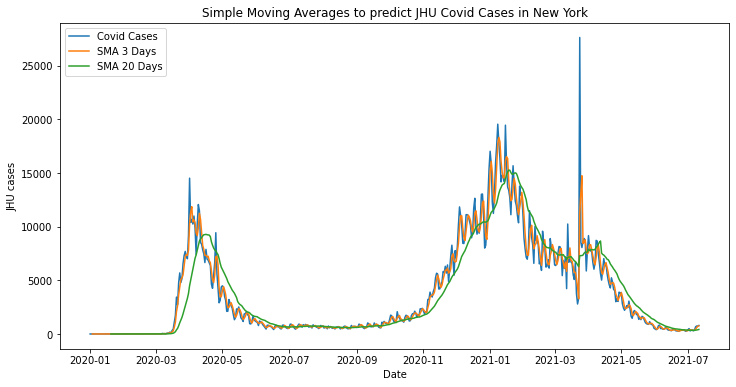

In [ ]:
#Selected state NY and call variables
info_sel_state = sel_state("New York")
info_train_test = train_test("New York")
ny_df=info_train_test[4] # This is a DF of xtrain with the information pertaining to only the state of NY
ytrain=info_train_test[1]

#Simple moving average for JHU Cases (index 0) for a size of 3 and create a new column to store it
ny_df['pandas_SMA_3'] = ny_df.iloc[:,0].rolling(window=3).mean() #Note 0 is the column for JHU_cases    

#Simple moving average for a size of 20 and create a new column to store it
#Using the clean implementation
ny_df['pandas_SMA_20'] = ny_df.iloc[:,0].rolling(window=20).mean()

#Doing the plots
plt.figure(figsize=(12,6))
plt.title("Simple Moving Averages to predict JHU Covid Cases in New York")
plt.plot(ny_df['date'],ny_df['JHU_cases'],label='Covid Cases')
plt.plot(ny_df['date'],ny_df['pandas_SMA_3'],label='SMA 3 Days')
plt.plot(ny_df['date'],ny_df['pandas_SMA_20'],label='SMA 20 Days')
plt.xlabel("Date")
plt.ylabel("JHU cases")
plt.legend(loc=2)
plt.show()

Another approach is Cumulative Moving Average (CMA): unlike simple moving average which drops the oldest observation as the new one gets added, cumulative moving average considers all prior observations [2].


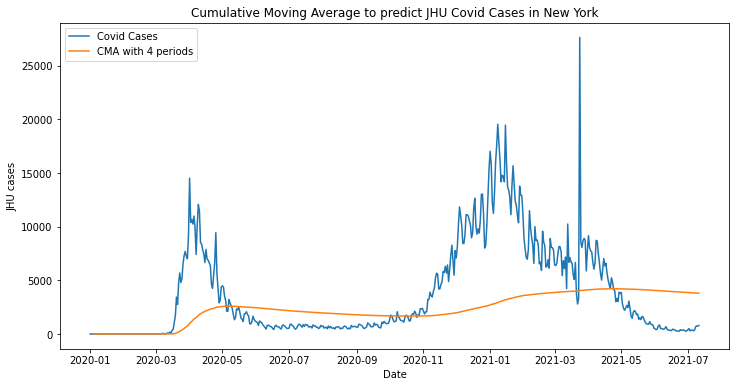

In [ ]:
# Cumulative Moving Average for JHU Cases (index 0) for 4 min periods and create a new column to store it
ny_df['CMA_4'] = ny_df['JHU_cases'].expanding(min_periods=4).mean()

plt.figure(figsize=(12,6))
plt.title("Cumulative Moving Average to predict JHU Covid Cases in New York")
plt.plot(ny_df['date'],ny_df['JHU_cases'],label='Covid Cases')
plt.plot(ny_df['date'],ny_df['CMA_4'],label='CMA with 4 periods')
plt.xlabel("Date")
plt.ylabel("JHU cases")
plt.legend(loc=2)
plt.show()

Exponential Moving Average (EMA): unlike SMA and CMA, exponential moving average gives more weight to the recent values and as a result of which, it can be a better model or better capture the movement of trends in a faster way. EMA's reaction is directly proportional to the pattern of the data. Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest changes as compared to SMAs, which makes the results from EMAs more timely and hence EMA is preferred over other techniques [3].


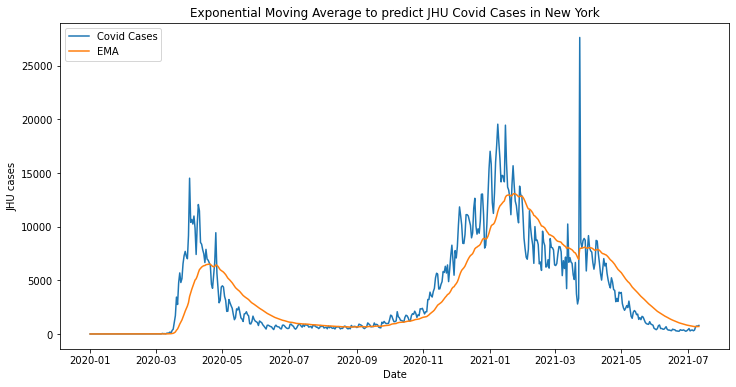

In [ ]:
ny_df['EMA'] = ny_df.iloc[:,0].ewm(span=40,adjust=False).mean()

plt.figure(figsize=(12,6))
plt.title("Exponential Moving Average to predict JHU Covid Cases in New York")
plt.plot(ny_df['date'],ny_df['JHU_cases'],label='Covid Cases')
plt.plot(ny_df['date'],ny_df['EMA'],label='EMA')
plt.xlabel("Date")
plt.ylabel("JHU cases")
plt.legend(loc=2)
plt.show()

The way to determine the best moving average model is empirical and no formal method is available. In our case, the Moving Average models offer little prediction ability and do not take advantage of any predictors.

We will use MAPE and MSE to compare the different models for the State of New York.

1) Mean Absolute Percentage Error (MAPE): expresses accuracy as a percentage of the error. Because this number is a percentage, it can be easier to understand than the other statistics. For example, if the MAPE is 5, on average, the forecast is off by 5%.

2) Mean Squared Error (MSE): measures the average of error squares i.e. the average squared difference between the estimated values and true value.

These statistics are not very informative by themselves, but we can use them to compare the fits obtained by using different methods. For both measures, smaller values usually indicate a better fitting model [4].


In [ ]:
def return_metrics(input_df):
    input_df = input_df.fillna(0) #replace nan that appeared in the first poisitions of SMA
    
    MAPE_SMA3=mean_absolute_error(input_df['JHU_cases'].tolist(), input_df['pandas_SMA_3'].tolist())
    MAPE_SMA20=mean_absolute_error(input_df['JHU_cases'].tolist(), input_df['pandas_SMA_20'].tolist())
    MAPE_CMA4=mean_absolute_error(input_df['JHU_cases'].tolist(), input_df['CMA_4'].tolist())
    MAPE_EMA=mean_absolute_error(input_df['JHU_cases'].tolist(), input_df['EMA'].tolist())
    print("-------------------------------------")
    print("Mean Absolute Error (MAE)")
    print("For Simple Moving Average (SMA) size of 3:",MAPE_SMA3)
    print("For Simple Moving Average (SMA) size of 20:",MAPE_SMA20)
    print("For Cumulative Moving Average (CMA) with 4 minimum periods:",MAPE_CMA4)
    print("For Exponential Moving Average (EMA):",MAPE_EMA)
        
    MSE_SMA3=mean_squared_error(input_df['JHU_cases'].tolist(), input_df['pandas_SMA_3'].tolist())
    MSE_SMA20=mean_squared_error(input_df['JHU_cases'].tolist(), input_df['pandas_SMA_20'].tolist())
    MSE_CMA4=mean_squared_error(input_df['JHU_cases'].tolist(), input_df['CMA_4'].tolist())
    MSE_EMA=mean_squared_error(input_df['JHU_cases'].tolist(), input_df['EMA'].tolist())
    print("-------------------------------------")
    print("Mean Squared Error (MSE)")
    print("For Simple Moving Average (SMA) size of 3:",MSE_SMA3)
    print("For Simple Moving Average (SMA) size of 20:",MSE_SMA20)
    print("For Cumulative Moving Average (CMA) with 4 minimum periods:",MSE_CMA4)
    print("For Exponential Moving Average (EMA):",MSE_EMA)
    print("-------------------------------------")
        
    return MAPE_SMA3, MAPE_SMA20, MAPE_CMA4, MAPE_EMA

print("Calculating performance of Moving Averages for Covid Cases in New York")
metrics_ny=return_metrics(ny_df)
# Note that according to https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html
# the value of MAPE when some element of the y_true is zero is arbitrarily high because
# of the division by epsilon

Calculating performance of Moving Averages for Covid Cases in New York
-------------------------------------
Mean Absolute Error (MAE)
For Simple Moving Average (SMA) size of 3: 456.59259259259255
For Simple Moving Average (SMA) size of 20: 1035.6623655913977
For Cumulative Moving Average (CMA) with 4 minimum periods: 2907.3488355640297
For Exponential Moving Average (EMA): 1430.9678843660217
-------------------------------------
Mean Squared Error (MSE)
For Simple Moving Average (SMA) size of 3: 1126065.548387097
For Simple Moving Average (SMA) size of 20: 3538284.6018458786
For Cumulative Moving Average (CMA) with 4 minimum periods: 19145351.075307716
For Exponential Moving Average (EMA): 5111197.247293777
-------------------------------------


According to MSE, SMA with a size of 3 samples offers the best MSE.

#### b) Auto Regressive Moving Average (ARMA) Model


<a name="rnn_model_ny"></a>


[Return to contents](#contents) 

In [ ]:
# Augmented Dickey Fuller test (ADF Test) is a common statistical test 
# used to test whether a given Time series is stationary or not. 
# Please refer to reference (5) in the references section for further detail

# Using info New York
info_sel_state = sel_state("New York")
info_train_test=train_test("New York")

# scaler
scaler_y = MinMaxScaler(feature_range=(0, 1))

# normalizing ytrain
ytrain = info_train_test[1].to_numpy().reshape(-1,1)
ytrain = scaler_y.fit_transform(ytrain)
ytrain = ytrain.reshape(1,-1)
ytrain = pd.Series(ytrain[0])


ADF = adfuller(ytrain)   
print(f'ADF Statistic: {round(ADF[0],3)}') 
print(f'p-value: {ADF[1]:.3e}')

ADF Statistic: -2.414
p-value: 1.379e-01


"If the ADF statistic is a large negative number and 
the p-value is smaller than 0.05, then our series is stationary." 

In our case the p-value is greater than 0.05 therefore the data is not 
stationary and we need to apply transformation.

In order to convert the data to stationary we need to apply 
transformation, we will be using numpy and will try different 
differentiations until we get a stationary data. 



In [ ]:
# Differentiating ytrain to the first order by using np.diff function
ytrain_diff = np.diff(ytrain, n=1)

ADF_diff = adfuller(ytrain_diff)   
print(f'ADF Statistic: {round(ADF_diff[0],3)}') 
print(f'p-value: {ADF_diff[1]:.3e}')

ADF Statistic: -6.031
p-value: 1.418e-07


Based on the results above we are seeing ADF p-value very close to 0. 
Therefore we can say that the data is stationary. 

Text(18.75, 0.5, 'Autocorrelation')

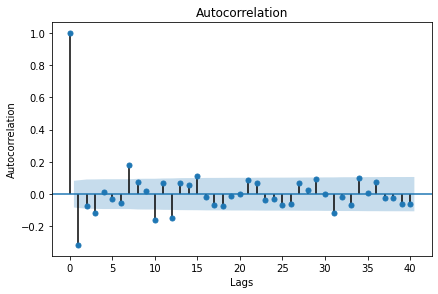

In [ ]:
plot_acf(ytrain_diff, lags=40);
plt.tight_layout()
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")

The graph above shows that lag 1 is the most significant and lags become insignificant compared to lag 1 thereafter. However, we see that certain lags are significant. We understand that detection and infection of covid have a certain lag (multiple days must pass to confirm that a patient has been infected after exposure). Confirmed infection rates on day 1 will be correlated with confirmed infection rates multiple days later. 

We can treat the lags as hyperparameters and we will be modeling different orders of ARMA models to see which hyperparameter is performing the best.

In [ ]:
#############
# ARMA VALIDATION PART
#############
# Please refer to references (6) and (7) in the reference section
# for further details regarding the code used in this section


###
#xtrain
###
xtrain=info_train_test[4]
xtrain_copy=xtrain.loc[:, ~xtrain.columns.isin(['date', 'JHU_cases'])]

model_ma_results=[]
models_ma=[]
rmse=[]
# we are specifying the hyper parameters of the MA model below
# we will use 1st, 3rd and 7th lag in the model
rmse_list = [1,3,7]

# Time series cross-validation 

tss = TimeSeriesSplit(n_splits = 4, gap=0)
# loop for hyperparameters
for i in rmse_list:
  # loop for cross validation
  for train_index, val_index in tss.split(ytrain):
      train_y, val_y = ytrain.iloc[train_index], ytrain.iloc[val_index]
      
      # we will also be using the first order AR in this model 
      model_ma = ARMA(train_y, order=(1, i)).fit(disp=False)
      predictions = model_ma.predict(val_y.index.values[0], val_y.index.values[-1])
      true_values = val_y.values
      # appending the rmse to the list
      # we will pick the lag with the smallest rmse 
      rmse.append(math.sqrt(mean_squared_error(true_values, predictions)))

  print(f"RMSE for order {i} is : ", round(np.mean(rmse),4))

RMSE for order 1 is :  0.1367
RMSE for order 3 is :  0.1331
RMSE for order 7 is :  0.1325


We do not observe a significant difference in the RMSE with different orders in the moving average. With test dataset below we decided to pick the order (7) with the smallest RMSE

In [ ]:
# ARMA TEST PART

# normalizing ytest
ytest  = info_train_test[3].to_numpy().reshape(-1,1)
ytest  = scaler_y.fit_transform(ytest)
ytest = ytest.reshape(1,-1)
ytest = pd.Series(ytest[0])

# using the 1st order AR and 7th order MA for test
model_ma = ARMA(train_y, order=(1, 7)).fit(disp=False)

ytest = ytest.reset_index(drop=True)
predictions = model_ma.predict(ytest.index.values[0], ytest.index.values[-1])

true_values = ytest.values
print("The MSE is : " , round(math.sqrt(mean_squared_error(true_values, predictions)),4))
MAE_0_ny=mean_absolute_error(true_values, predictions)
print("The MAE is : " , round(MAE_0_ny,4))

The MSE is :  0.2144
The MAE is :  0.1295


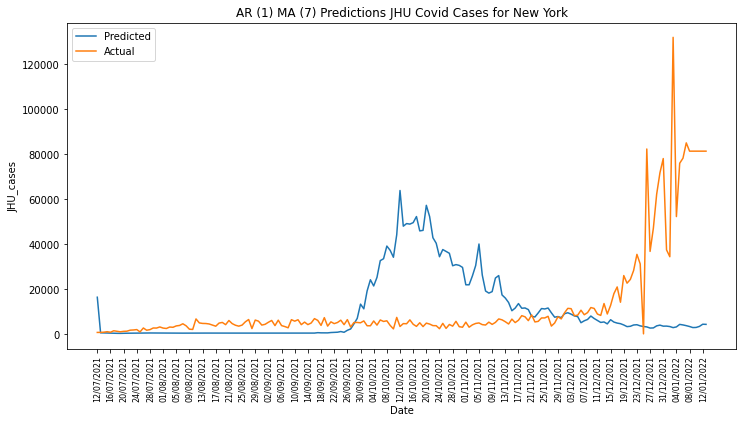

In [ ]:
# The predictions below are the predictions for order 7
# We reshape the predictions then 
# inverse transform and plot the predictions vs. actuals 
predictions = predictions.values
predictions = predictions.reshape(-1, 1)
list_ARMA = scaler_y.inverse_transform(predictions).reshape(1,-1)[0]
#list_ARMA = predictions.tolist()

ytest  = info_train_test[3]

#Transform date to string    
xtest_df=info_train_test[5]
dates=xtest_df["date"]
list_dates=[]
for i in dates:
    date=i.strftime("%d/%m/%Y")
    list_dates.append(date)

plt.figure(figsize=(12,6))
plt.plot(range(len(ytest)), list_ARMA, label="Predicted")
plt.plot(range(len(ytest)),list(ytest), label="Actual")
plt.title(f"AR (1) MA (7) Predictions JHU Covid Cases for {file_names[info_sel_state[0]]}")
plt.xticks(range(len(ytest))[::4], list_dates[::4], rotation ="vertical", fontsize= 8)
plt.xlabel("Date")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

Baseline model for New York fails to predict the Covid cases accurately. We will be moving onto RMSE in the next sections and we will be comparing the other models with this baseline model. 

### 4.5.2 California<a name="baseline_cal"></a>


[Return to contents](#contents)  

#### a) Simple Moving Average Models


<a name="rnn_model_ny"></a>


[Return to contents](#contents) 

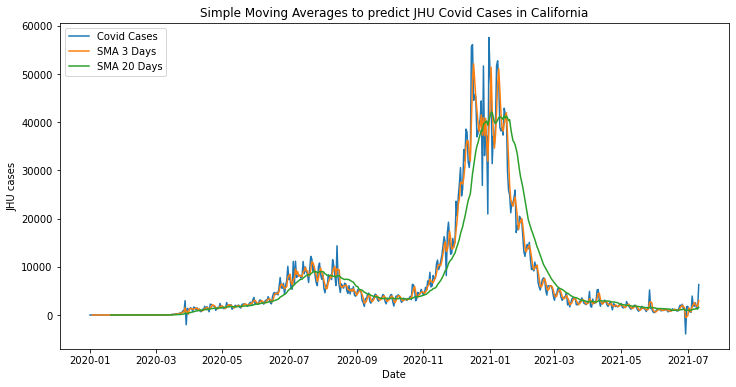

In [ ]:
#Selected state California and call variables
info_sel_state = sel_state("California")
info_train_test = train_test("California")
ca_df=info_train_test[4] # This is a DF of xtrain with the information pertaining to only the state of NY
ytrain=info_train_test[1]

#Simple moving average for JHU Cases (index 0) for a size of 3 and create a new column to store it
ca_df['pandas_SMA_3'] = ca_df.iloc[:,0].rolling(window=3).mean() #Note 0 is the column for JHU_cases    

#Simple moving average for a size of 20 and create a new column to store it
#Using the clean implementation
ca_df['pandas_SMA_20'] = ca_df.iloc[:,0].rolling(window=20).mean()

#Doing the plots
plt.figure(figsize=(12,6))
plt.title("Simple Moving Averages to predict JHU Covid Cases in California")
plt.plot(ca_df['date'],ca_df['JHU_cases'],label='Covid Cases')
plt.plot(ca_df['date'],ca_df['pandas_SMA_3'],label='SMA 3 Days')
plt.plot(ca_df['date'],ca_df['pandas_SMA_20'],label='SMA 20 Days')
plt.xlabel("Date")
plt.ylabel("JHU cases")
plt.legend(loc=2)
plt.show()

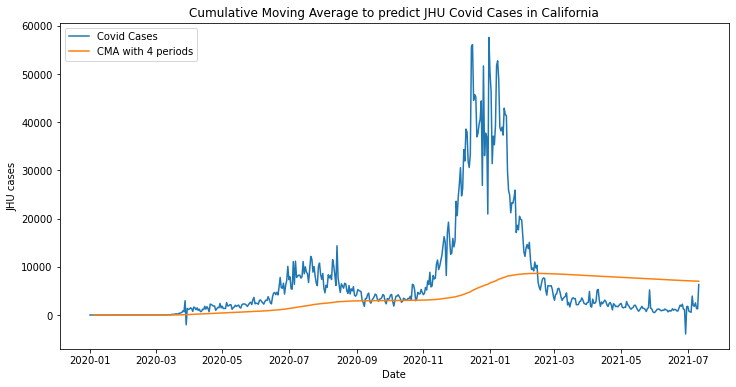

In [ ]:
# Cumulative Moving Average for JHU Cases (index 0) for 4 min periods and create a new column to store it
ca_df['CMA_4'] = ca_df['JHU_cases'].expanding(min_periods=4).mean()

plt.figure(figsize=(12,6))
plt.title("Cumulative Moving Average to predict JHU Covid Cases in California")
plt.plot(ca_df['date'],ca_df['JHU_cases'],label='Covid Cases')
plt.plot(ca_df['date'],ca_df['CMA_4'],label='CMA with 4 periods')
plt.xlabel("Date")
plt.ylabel("JHU cases")
plt.legend(loc=2)
plt.show()

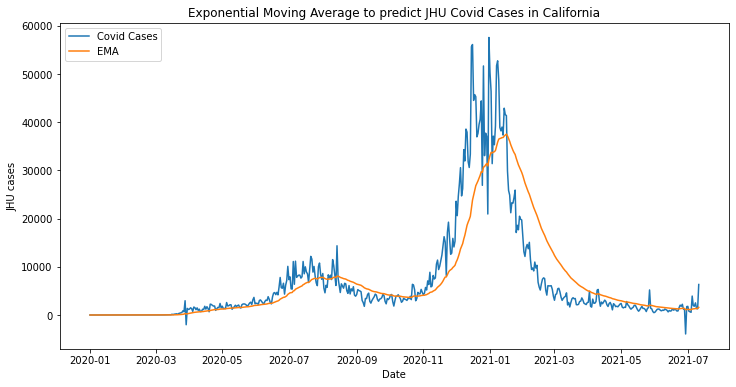

In [ ]:
ca_df['EMA'] = ca_df.iloc[:,0].ewm(span=40,adjust=False).mean()

plt.figure(figsize=(12,6))
plt.title("Exponential Moving Average to predict JHU Covid Cases in California")
plt.plot(ca_df['date'],ca_df['JHU_cases'],label='Covid Cases')
plt.plot(ca_df['date'],ca_df['EMA'],label='EMA')
plt.xlabel("Date")
plt.ylabel("JHU cases")
plt.legend(loc=2)
plt.show()

In [ ]:
print("Calculating performance of Moving Averages for Covid Cases in California")
metrics_cal=return_metrics(ca_df)

# Note that according to https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html
# the value of MAPE when some element of the y_true is zero is arbitrarily high because
# of the division by epsilon

Calculating performance of Moving Averages for Covid Cases in California
-------------------------------------
Mean Absolute Error (MAE)
For Simple Moving Average (SMA) size of 3: 920.7909199522103
For Simple Moving Average (SMA) size of 20: 2080.134677419355
For Cumulative Moving Average (CMA) with 4 minimum periods: 6010.752394787415
For Exponential Moving Average (EMA): 3058.7360460414293
-------------------------------------
Mean Squared Error (MSE)
For Simple Moving Average (SMA) size of 3: 4123623.7256073286
For Simple Moving Average (SMA) size of 20: 17972695.588239245
For Cumulative Moving Average (CMA) with 4 minimum periods: 117571636.7037175
For Exponential Moving Average (EMA): 31312807.78724574
-------------------------------------


Again MSE for SMA size 3 offers the best values. Unfortunately, as described before, these models offer limited predicitive ability.

#### b) Auto Regressive Moving Average (ARMA) Model
<a name="rnn_model_ny"></a>


[Return to contents](#contents) 

In [ ]:
# Augmented Dickey Fuller test (ADF Test) is a common statistical test 
# used to test whether a given Time series is stationary or not. 
# Please refer to reference (5) in the references section for further detail

# ytrain

# Using info New York
info_sel_state = sel_state("California")
info_train_test=train_test("California")

#ytrain=info_train_test[1]

# scaler
scaler_y = MinMaxScaler(feature_range=(0, 1))

# normalizing ytrain
ytrain = info_train_test[1].to_numpy().reshape(-1,1)
ytrain = scaler_y.fit_transform(ytrain)
ytrain = ytrain.reshape(1,-1)
ytrain = pd.Series(ytrain[0])

ADF = adfuller(ytrain)   
print(f'ADF Statistic: {round(ADF[0],3)}') 
print(f'p-value: {ADF[1]:.3e}')

ADF Statistic: -2.732
p-value: 6.863e-02


"If the ADF statistic is a large negative number and 
the p-value is smaller than 0.05, then our series is stationary." 

In our case the p-value is greater than 0.05 therefore the data is not 
stationary and we need to apply transformation.

In order to convert the data to stationary we need to apply 
transformation, we will be using numpy and will try different 
differentiations until we get a stationary data. 


In [ ]:
# Differentiating ytrain to the first order by using np.diff function
ytrain_diff = np.diff(ytrain, n=1)

ADF_diff = adfuller(ytrain_diff)   
print(f'ADF Statistic: {round(ADF_diff[0],3)}') 
print(f'p-value: {ADF_diff[1]:.3e}')

ADF Statistic: -4.343
p-value: 3.741e-04


Based on the results above we are seeing ADF p-value very close to 0. 
Therefore we can say that the data is stationary.

Text(18.75, 0.5, 'Autocorrelation')

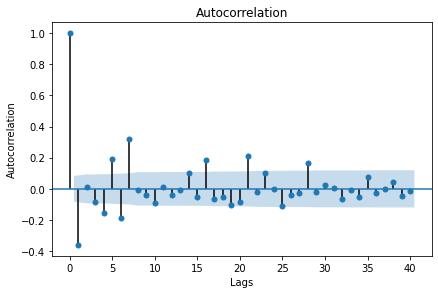

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ytrain_diff, lags=40);
plt.tight_layout()
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")

The graph above shows that lag 1 is the most significant and lags become insignificant compared to lag 1 thereafter. However, we see that certain lags are significant. We understand that detection and infection of covid have a certain lag (multiple days must pass to confirm that a patient has been infected after exposure). Confirmed infection rates on day 1 will be correlated with confirmed infection rates multiple days later. 

We can treat the lags as hyperparameters and we will be modeling different orders of ARMA models to see which hyperparameter is performing the best.

In [ ]:
#############
# ARMA VALIDATION PART
#############
# Please refer to references (6) and (7) in the reference section
# for further details regarding the code used in this section


###
#xtrain
###
xtrain=info_train_test[4]
xtrain_copy=xtrain.loc[:, ~xtrain.columns.isin(['date', 'JHU_cases'])]

from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
import math

model_ma_results=[]
models_ma=[]
rmse=[]
# we are specifying the hyper parameters of the MA model below
# we will use 1st, 3rd and 7th lag in the model
rmse_list = [1,4,5,6,7]

# Time series cross-validation 

tss = TimeSeriesSplit(n_splits = 3, gap=0)
# loop for hyperparameters
for i in rmse_list:
  # loop for cross validation
  for train_index, val_index in tss.split(ytrain):
      train_y, val_y = ytrain.iloc[train_index], ytrain.iloc[val_index]
      
      # we will be using AR(0) in this model 
      model_ma = ARMA(train_y, order=(0, i)).fit(disp=False)
      predictions = model_ma.predict(val_y.index.values[0], val_y.index.values[-1])
      true_values = val_y.values
      # appending the rmse to the list
      # we will pick the lag with the smallest rmse 
      rmse.append(math.sqrt(mean_squared_error(true_values, predictions)))

  print(f"RMSE for order {i} is : ", round(np.mean(rmse),4))

RMSE for order 1 is :  0.188
RMSE for order 4 is :  0.1879
RMSE for order 5 is :  0.1878
RMSE for order 6 is :  0.1878
RMSE for order 7 is :  0.1877


We do not observe a significant difference in the RMSE with different orders in the moving average. With test dataset below we decided to pick the order (7) with the smallest RMSE

In [ ]:
# ARMA TEST PART

# normalizing ytest
ytest  = info_train_test[3].to_numpy().reshape(-1,1)
ytest  = scaler_y.fit_transform(ytest)
ytest = ytest.reshape(1,-1)
ytest = pd.Series(ytest[0])

# using the 0th order AR and 7th order MA for test
model_ma = ARMA(train_y, order=(0, 7)).fit(disp=False)

ytest = ytest.reset_index(drop=True)
predictions = model_ma.predict(ytest.index.values[0], ytest.index.values[-1])

true_values = ytest.values
print("The MSE is : " , round(math.sqrt(mean_squared_error(true_values, predictions)),4))
MAE_0_cal=mean_absolute_error(true_values, predictions)
print("The MAE is : " , round(MAE_0_cal,4))

The MSE is :  0.1111
The MAE is :  0.0658


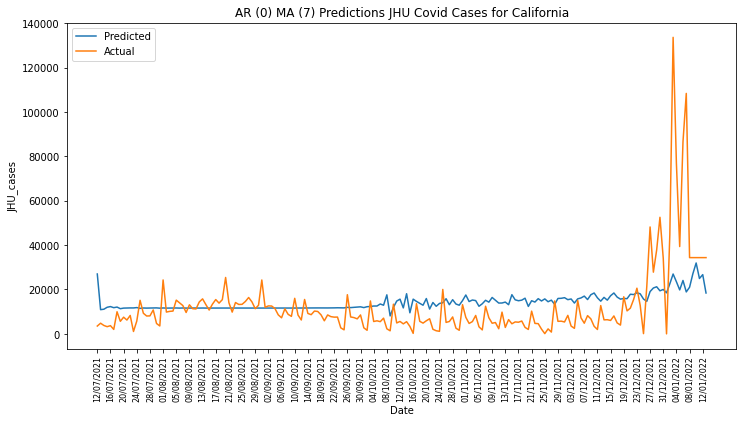

In [ ]:
# The predictions below are the predictions for order 7
# We reshape the predictions then 
# inverse transform and plot the predictions vs. actuals 
predictions = predictions.values
predictions = predictions.reshape(-1, 1)
list_ARMA = scaler_y.inverse_transform(predictions).reshape(1,-1)[0]
#list_ARMA = predictions.tolist()

ytest  = info_train_test[3]

#Transform date to string    
xtest_df=info_train_test[5]
dates=xtest_df["date"]
list_dates=[]
for i in dates:
    date=i.strftime("%d/%m/%Y")
    list_dates.append(date)

plt.figure(figsize=(12,6))
plt.plot(range(len(ytest)), list_ARMA, label="Predicted")
plt.plot(range(len(ytest)),list(ytest), label="Actual")
plt.title(f"AR (0) MA (7) Predictions JHU Covid Cases for {file_names[info_sel_state[0]]}")
plt.xticks(range(len(ytest))[::4], list_dates[::4], rotation ="vertical", fontsize= 8)
plt.xlabel("Date")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

Baseline model for New York fails to predict the Covid cases accurately. We will be moving onto RMSE in the next sections and we will be comparing the other models with this baseline model. 

## 4.6. RNN models<a name="rnn_models"></a>


[Return to contents](#contents)  

### 4.6.1 New York<a name="rnn_ny"></a>


[Return to contents](#contents)  

#### a) One-layer RNN model
<a name="rnn_model_ny"></a>


[Return to contents](#contents)  

We will be modeling a RNN model for the Covid cases. 
In the first part of the code we will scale the y-variable (cases) to fit in range 0 and 1. 

Then we will be using Keras built in function Timeseriesgenerator to create our train and test datasets. 

Our assumption is that Covid cases have a 14 day lag. The code below will predict as such, if x is from 0 to 14 days it will predict the cases on day 15 (y variable). If x is from 1 to 15 days it will predict the cases on day 16. 

In [ ]:
tf.keras.backend.clear_session()

# Using info New York
info_sel_state = sel_state("New York")
info_train_test=train_test("New York")

# Scaler
scaler_y = MinMaxScaler(feature_range=(0, 1))

# minmax scaler for y, scaling between 0 and 1
ytrain = info_train_test[1].to_numpy().reshape(-1,1)
ytrain = scaler_y.fit_transform(ytrain)
ytest  = info_train_test[3].to_numpy().reshape(-1,1)
ytest  = scaler_y.fit_transform(ytest)

#Call x variables
xtrain=info_train_test[4]
xtrain.drop(["date", "JHU_cases"], axis=1, inplace=True)
xtest=info_train_test[5].copy()
xtest.drop(["date", "JHU_cases"], axis=1, inplace=True)

# time series generator uses 14 day block to predict the next day 
train_gen = TimeseriesGenerator(xtrain.to_numpy(), ytrain,
                               length=14, sampling_rate=1,  
                                batch_size = 558)

test_gen = TimeseriesGenerator(xtest.to_numpy(), ytest,
                                length=14, sampling_rate=1, 
                               batch_size = 186)

# Below we are creating x and y train and test variable from the generators
x_train, y_train = train_gen[0]
# x_val, y_val = val_gen[0]
x_test, y_test = test_gen[0]

print('x train shape is :', x_train.shape)
print('y train shape is :', y_train.shape)
print('x test shape is :' , x_test.shape)
print('y test shape is :' , y_test.shape)


x train shape is : (544, 14, 498)
y train shape is : (544, 1)
x test shape is : (172, 14, 498)
y test shape is : (172, 1)


The x train shape above is 544, 14, 498. 
544 is the number of batches that we can get if we use a 14 day window. And 498 is the number of predictive features (columns) in the original dataset. 

Following below we are building the RNN model. The input to our RNN model is the moving window days (14) and the features (498).

In [ ]:
# input dimension below
input_dim = x_train.shape[1:]
n_units = 100

#Create model
model_rnn_input = tf.keras.Input(shape=input_dim)
model_rnn_hidden = tf.keras.layers.SimpleRNN(units=n_units, return_sequences=False)(model_rnn_input)
model_rnn_output = tf.keras.layers.Dense(units=1, activation='linear')(model_rnn_hidden)
model_rnn = tf.keras.Model(inputs=model_rnn_input, outputs=model_rnn_output, name="model_rnn")

#Print the model architecture
print(model_rnn.summary())

#Compile model
model_rnn.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'mse', metrics=['mae'])

#Convert x to tensor
x_train_tf = tf.convert_to_tensor(x_train, np.float32)

#Fit model
history = model_rnn.fit(x_train_tf, y_train, epochs = 50, validation_split=0.1, batch_size = 1, verbose=1)

Model: "model_rnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 498)]         0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               59900     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
489/489 [==============================] - 4s 5ms/step - loss: 0.0375 - mae: 0.1197 - val_loss: 0.0363 - val_mae: 0.1828
Epoch 2/50
489/489 [==============================] - 2s 5ms/step - loss: 0.0071 - mae: 0.0597 - val_loss: 0.0198 - val_mae: 0.1352
Epoch 3/50
489/489 [============================

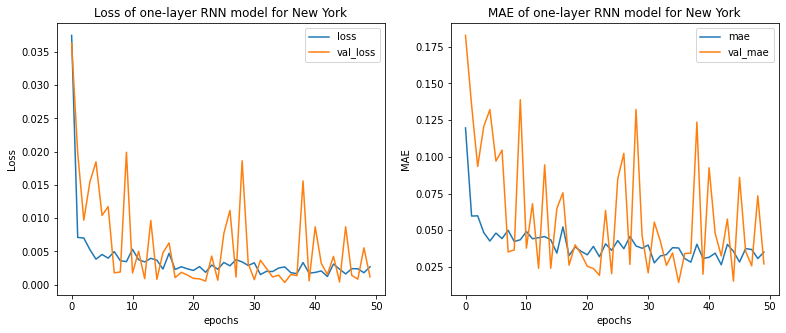

In [ ]:
# Plotting the loss and MAE graphs
# Plot training results
epochs=50
fig = plt.figure(figsize=(20,5))
axs = fig.add_subplot(1,3,1)
axs.set_title(f'Loss of one-layer RNN model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["loss","val_loss"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')
axs.legend()

axs = fig.add_subplot(1,3,2)
axs.set_title(f'MAE of one-layer RNN model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["mae","val_mae"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('MAE')
    axs.set_xlabel('epochs')
axs.legend()

plt.show()

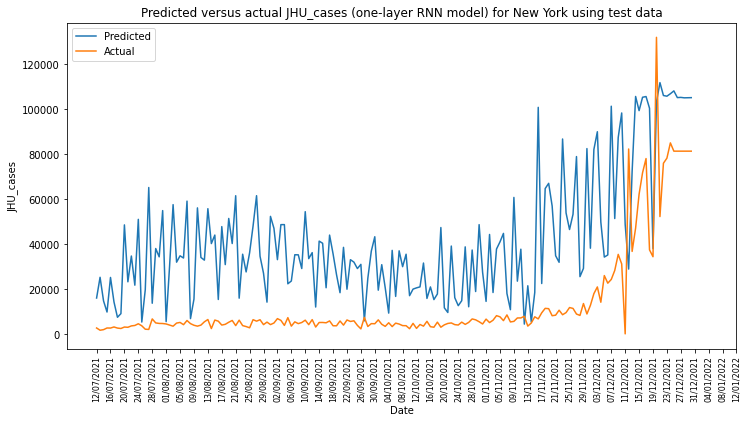

In [ ]:
# Predicting the y variable

# we are using inverse transform below to convert the minmax scaled y to the original cases
rnn_prediction = scaler_y.inverse_transform(model_rnn.predict(x_test))


#Transform date to string    
xtest_df=info_train_test[5]
dates=xtest_df["date"]
list_dates=[]
for i in dates:
    date=i.strftime("%d/%m/%Y")
    list_dates.append(date)
    
#Plot
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), rnn_prediction, label="Predicted")
plt.plot(range(len(y_test)),list(scaler_y.inverse_transform(y_test)), label="Actual")
plt.title(f"Predicted versus actual JHU_cases (one-layer RNN model) for {file_names[info_sel_state[0]]} using test data")
plt.xticks(range(len(ytest))[::4], list_dates[::4], rotation ="vertical", fontsize= 8)
plt.xlabel("Date")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

In [ ]:
#Calculate mean MAE
mean_MAE=[]
for metric in ["mae","val_mae"]:
    mean_MAE.append(np.mean(history.history[metric]))

MAE_1=round(mean_MAE[0],4)
MAE_val_1=round(mean_MAE[1],4)

print("The MAE of the model is", MAE_1)
print("The validation MAE of the model is", MAE_val_1)


The MAE of the model is 0.0408
The validation MAE of the model is 0.0602


#### b) Multi-layer RNN model

Below we are creating a naive multi layer RNN model. 

In [ ]:
# input dimension below
input_dim = x_train.shape[1:]
n_units = 128
n_units2 = 64

#Create model
model_rnn_input = tf.keras.Input(shape=input_dim)
model_rnn_hidden = tf.keras.layers.SimpleRNN(units=n_units, return_sequences=True, dropout=0.2 )(model_rnn_input)
model_rnn_hidden = tf.keras.layers.SimpleRNN(units=n_units2, return_sequences=False, dropout=0.2)(model_rnn_hidden)
model_rnn_output = tf.keras.layers.Dense(units=1, activation='linear')(model_rnn_hidden)
model_rnn = tf.keras.Model(inputs=model_rnn_input, outputs=model_rnn_output, name="model_rnn")


#Print the model architecture
print(model_rnn.summary())

#Compile model
model_rnn.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'mse', metrics=['mae'])

#Convert x to tensor
x_train_tf = tf.convert_to_tensor(x_train, np.float32)

#Fit model
history = model_rnn.fit(x_train_tf, y_train, epochs = 50, validation_split=0.1, batch_size = 1, verbose=1)

Model: "model_rnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 14, 498)]         0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 14, 128)           80256     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 92,673
Trainable params: 92,673
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
489/489 [==============================] - 6s 9ms/step - loss: 0.0792 - mae: 0.1850 - val_loss: 0.1080 - val_mae: 0.3281
Epoch 2/50
489/489 [============================

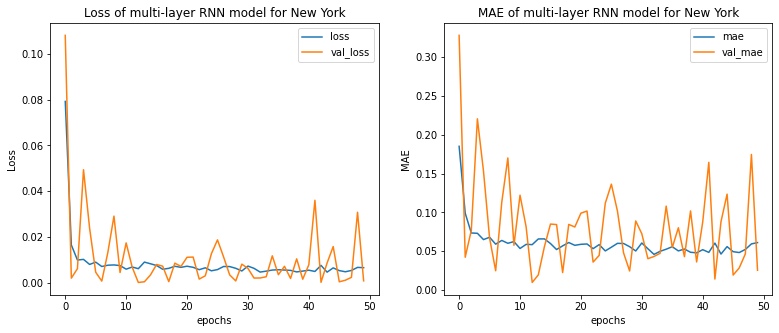

In [ ]:
# Plotting the loss and MAE graphs
# Plot training results
epochs=50
fig = plt.figure(figsize=(20,5))
axs = fig.add_subplot(1,3,1)
axs.set_title(f'Loss of multi-layer RNN model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["loss","val_loss"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')
axs.legend()

axs = fig.add_subplot(1,3,2)
axs.set_title(f'MAE of multi-layer RNN model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["mae","val_mae"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('MAE')
    axs.set_xlabel('epochs')
axs.legend()

plt.show()

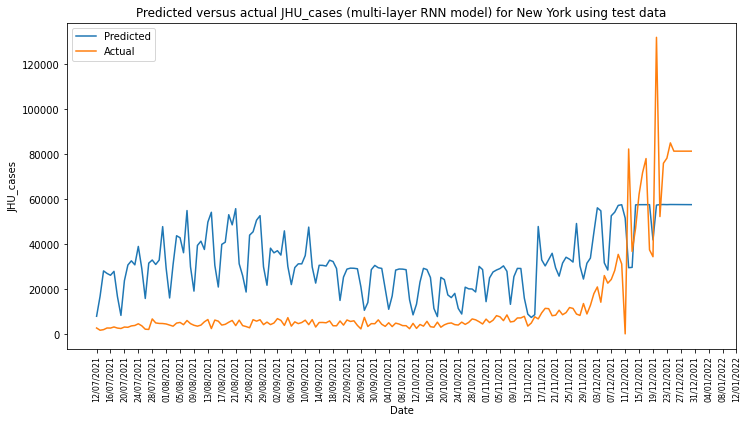

In [ ]:
# Predicting the y variable

# we are using inverse transform below to convert the minmax scaled y to the original cases
rnn_prediction = scaler_y.inverse_transform(model_rnn.predict(x_test))

#Transform date to string    
xtest_df=info_train_test[5]
dates=xtest_df["date"]
list_dates=[]
for i in dates:
    date=i.strftime("%d/%m/%Y")
    list_dates.append(date)
    
#Plot
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), rnn_prediction, label="Predicted")
plt.plot(range(len(y_test)),list(scaler_y.inverse_transform(y_test)), label="Actual")
plt.title(f"Predicted versus actual JHU_cases (multi-layer RNN model) for {file_names[info_sel_state[0]]} using test data")
plt.xticks(range(len(ytest))[::4], list_dates[::4], rotation ="vertical", fontsize= 8)
plt.xlabel("Date")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

In [ ]:
#Calculate mean MAE
mean_MAE=[]
for metric in ["mae","val_mae"]:
    mean_MAE.append(np.mean(history.history[metric]))

MAE_2=round(mean_MAE[0],4)
MAE_val_2=round(mean_MAE[1],4)

print("The MAE of the model is", MAE_2)
print("The validation MAE of the model is", MAE_val_2)


The MAE of the model is 0.0601
The validation MAE of the model is 0.0817


### 4.6.2 California<a name="baseline_cal"></a>


[Return to contents](#contents)  

#### a) One-layer RNN model
<a name="rnn_model_cal"></a>


[Return to contents](#contents)  

Below we replicated the steps above for the state of California.

In [ ]:
tf.keras.backend.clear_session()

# Using info New York
info_sel_state = sel_state("California")
info_train_test=train_test("California")

# Scaler
scaler_y = MinMaxScaler(feature_range=(0, 1))

# minmax scaler for y, scaling between 0 and 1
ytrain = info_train_test[1].to_numpy().reshape(-1,1)
ytrain = scaler_y.fit_transform(ytrain)
ytest  = info_train_test[3].to_numpy().reshape(-1,1)
ytest  = scaler_y.fit_transform(ytest)

#Call x variables
xtrain=info_train_test[4]
xtrain.drop(["date", "JHU_cases"], axis=1, inplace=True)
xtest=info_train_test[5].copy()
xtest.drop(["date", "JHU_cases"], axis=1, inplace=True)

# time series generator uses 14 day block to predict the next day 
train_gen = TimeseriesGenerator(xtrain.to_numpy(), ytrain,
                               length=14, sampling_rate=1,  
                                batch_size = 558)

test_gen = TimeseriesGenerator(xtest.to_numpy(), ytest,
                                length=14, sampling_rate=1, 
                               batch_size = 186)

# Below we are creating x and y train and test variable from the generators
x_train, y_train = train_gen[0]
# x_val, y_val = val_gen[0]
x_test, y_test = test_gen[0]

print('x train shape is :', x_train.shape)
print('y train shape is :', y_train.shape)
print('x test shape is :' , x_test.shape)
print('y test shape is :' , y_test.shape)

x train shape is : (544, 14, 498)
y train shape is : (544, 1)
x test shape is : (172, 14, 498)
y test shape is : (172, 1)


In [ ]:
# input dimension below
input_dim = x_train.shape[1:]
n_units = 100

#Create model
model_rnn_input = tf.keras.Input(shape=input_dim)
model_rnn_hidden = tf.keras.layers.SimpleRNN(units=n_units, return_sequences=False)(model_rnn_input)
model_rnn_output = tf.keras.layers.Dense(units=1, activation='linear')(model_rnn_hidden)
model_rnn = tf.keras.Model(inputs=model_rnn_input, outputs=model_rnn_output, name="model_rnn")

#Print the model architecture
print(model_rnn.summary())

#Compile model
model_rnn.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'mse', metrics=['mae'])

#Convert x to tensor
x_train_tf = tf.convert_to_tensor(x_train, np.float32)

#Fit model
history = model_rnn.fit(x_train_tf, y_train, epochs = 50, validation_split=0.1, batch_size = 1, verbose=1)

Model: "model_rnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 498)]         0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               59900     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
489/489 [==============================] - 3s 5ms/step - loss: 0.0399 - mae: 0.1217 - val_loss: 0.0082 - val_mae: 0.0801
Epoch 2/50
489/489 [==============================] - 2s 5ms/step - loss: 0.0092 - mae: 0.0701 - val_loss: 0.0023 - val_mae: 0.0368
Epoch 3/50
489/489 [============================

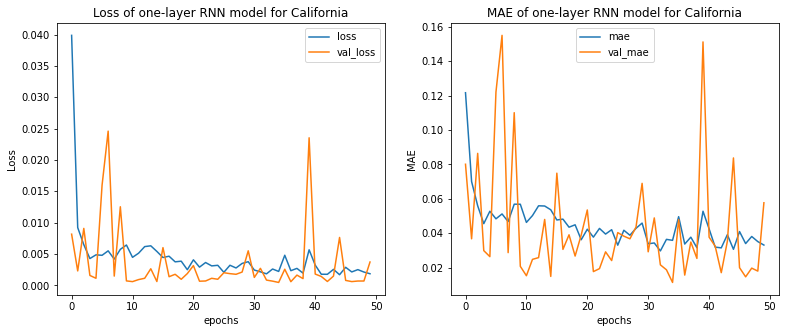

In [ ]:
# Plotting the loss and MAE graphs
# Plot training results
epochs=50
fig = plt.figure(figsize=(20,5))
axs = fig.add_subplot(1,3,1)
axs.set_title(f'Loss of one-layer RNN model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["loss","val_loss"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')
axs.legend()

axs = fig.add_subplot(1,3,2)
axs.set_title(f'MAE of one-layer RNN model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["mae","val_mae"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('MAE')
    axs.set_xlabel('epochs')
axs.legend()

plt.show()

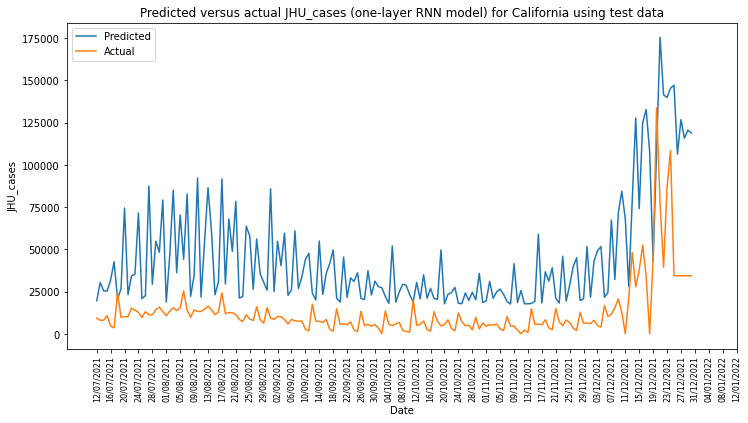

In [ ]:
# Predicting the y variable

# we are using inverse transform below to convert the minmax scaled y to the original cases
rnn_prediction = scaler_y.inverse_transform(model_rnn.predict(x_test))


#Transform date to string    
xtest_df=info_train_test[5]
dates=xtest_df["date"]
list_dates=[]
for i in dates:
    date=i.strftime("%d/%m/%Y")
    list_dates.append(date)
    
#Plot
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), rnn_prediction, label="Predicted")
plt.plot(range(len(y_test)),list(scaler_y.inverse_transform(y_test)), label="Actual")
plt.title(f"Predicted versus actual JHU_cases (one-layer RNN model) for {file_names[info_sel_state[0]]} using test data")
plt.xticks(range(len(ytest))[::4], list_dates[::4], rotation ="vertical", fontsize= 8)
plt.xlabel("Date")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

In [ ]:
#Calculate mean MAE
mean_MAE=[]
for metric in ["mae","val_mae"]:
    mean_MAE.append(np.mean(history.history[metric]))

MAE_3=round(mean_MAE[0],4)
MAE_val_3=round(mean_MAE[1],4)

print("The MAE of the model is", MAE_3)
print("The validation MAE of the model is", MAE_val_3)


The MAE of the model is 0.0446
The validation MAE of the model is 0.043


#### b) Multi-layer RNN model

In [ ]:
# input dimension below
input_dim = x_train.shape[1:]
n_units = 128
n_units2 = 64

#Create model
model_rnn_input = tf.keras.Input(shape=input_dim)
model_rnn_hidden = tf.keras.layers.SimpleRNN(units=n_units, return_sequences=True, dropout=0.2 )(model_rnn_input)
model_rnn_hidden = tf.keras.layers.SimpleRNN(units=n_units2, return_sequences=False, dropout=0.2)(model_rnn_hidden)
model_rnn_output = tf.keras.layers.Dense(units=1, activation='linear')(model_rnn_hidden)
model_rnn = tf.keras.Model(inputs=model_rnn_input, outputs=model_rnn_output, name="model_rnn")

#Print the model architecture
print(model_rnn.summary())

#Compile model
model_rnn.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'mse', metrics=['mae'])

#Convert x to tensor
x_train_tf = tf.convert_to_tensor(x_train, np.float32)

#Fit model
history = model_rnn.fit(x_train_tf, y_train, epochs = 50, validation_split=0.1, batch_size = 1, verbose=1)

Model: "model_rnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 14, 498)]         0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 14, 128)           80256     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 92,673
Trainable params: 92,673
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
489/489 [==============================] - 6s 9ms/step - loss: 0.0828 - mae: 0.1981 - val_loss: 0.0043 - val_mae: 0.0634
Epoch 2/50
489/489 [============================

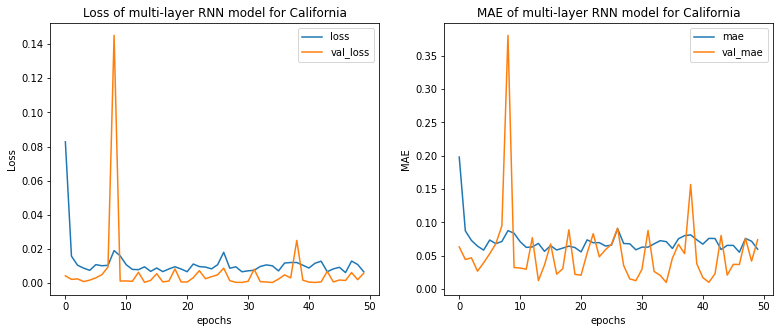

In [ ]:
# Plotting the loss and MAE graphs
# Plot training results
epochs=50
fig = plt.figure(figsize=(20,5))
axs = fig.add_subplot(1,3,1)
axs.set_title(f'Loss of multi-layer RNN model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["loss","val_loss"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')
axs.legend()

axs = fig.add_subplot(1,3,2)
axs.set_title(f'MAE of multi-layer RNN model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["mae","val_mae"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('MAE')
    axs.set_xlabel('epochs')
axs.legend()

plt.show()

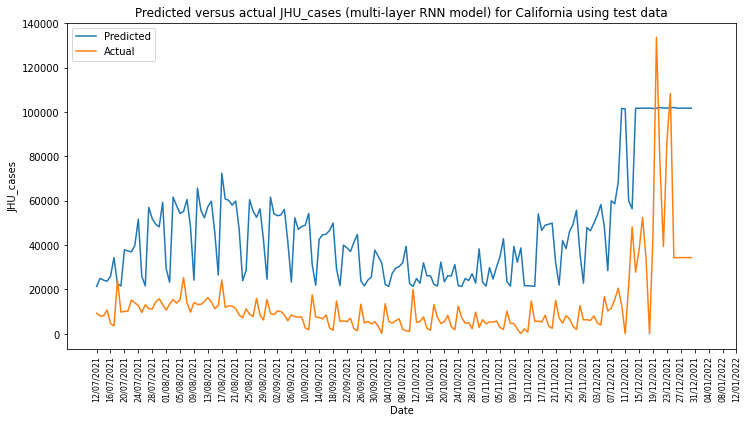

In [ ]:
# Predicting the y variable

# we are using inverse transform below to convert the minmax scaled y to the original cases
rnn_prediction = scaler_y.inverse_transform(model_rnn.predict(x_test))


#Transform date to string    
xtest_df=info_train_test[5]
dates=xtest_df["date"]
list_dates=[]
for i in dates:
    date=i.strftime("%d/%m/%Y")
    list_dates.append(date)
    
#Plot
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), rnn_prediction, label="Predicted")
plt.plot(range(len(y_test)),list(scaler_y.inverse_transform(y_test)), label="Actual")
plt.title(f"Predicted versus actual JHU_cases (multi-layer RNN model) for {file_names[info_sel_state[0]]} using test data")
plt.xticks(range(len(ytest))[::4], list_dates[::4], rotation ="vertical", fontsize= 8)
plt.xlabel("Date")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

In [ ]:
#Calculate mean MAE
mean_MAE=[]
for metric in ["mae","val_mae"]:
    mean_MAE.append(np.mean(history.history[metric]))

MAE_4=round(mean_MAE[0],4)
MAE_val_4=round(mean_MAE[1],4)

print("The MAE of the model is", MAE_4)
print("The validation MAE of the model is", MAE_val_4)


The MAE of the model is 0.0715
The validation MAE of the model is 0.0544


## 4.7. LSTM models<a name="lstm_models"></a>


[Return to contents](#contents)  

The next natural step was to start experimenting with LSTM models, which have proven to be very effective in predicting time series.

### 4.7.1 New York<a name="lstm_ny"></a>


[Return to contents](#contents)  


#### a) One-layer LSTM model
<a name="lstm_model_ny"></a>


[Return to contents](#contents)  

We started with a one-layer model, applying our train and test datasets as time series. Below is the naive LSTM model of the NY State, using one layer as a baseline model.

In [ ]:
tf.keras.backend.clear_session()

# Using info New York
info_sel_state = sel_state("New York")
info_train_test=train_test("New York")

# Scaler
scaler_y = MinMaxScaler(feature_range=(0, 1))

# minmax scaler for y, scaling between 0 and 1
ytrain = info_train_test[1].to_numpy().reshape(-1,1)
ytrain = scaler_y.fit_transform(ytrain)
ytest  = info_train_test[3].to_numpy().reshape(-1,1)
ytest  = scaler_y.fit_transform(ytest)

#Call x variables
xtrain=info_train_test[4]
xtrain.drop(["date", "JHU_cases"], axis=1, inplace=True)
xtest=info_train_test[5].copy()
xtest.drop(["date", "JHU_cases"], axis=1, inplace=True)

# time series generator uses 14 day block to predict the next day 
train_gen = TimeseriesGenerator(xtrain.to_numpy(), ytrain,
                               length=14, sampling_rate=1,  
                                batch_size = 558)

test_gen = TimeseriesGenerator(xtest.to_numpy(), ytest,
                                length=14, sampling_rate=1, 
                               batch_size = 186)

# Below we are creating x and y train and test variable from the generators
x_train, y_train = train_gen[0]
# x_val, y_val = val_gen[0]
x_test, y_test = test_gen[0]

print('x train shape is :', x_train.shape)
print('y train shape is :', y_train.shape)
print('x test shape is :' , x_test.shape)
print('y test shape is :' , y_test.shape)


x train shape is : (544, 14, 498)
y train shape is : (544, 1)
x test shape is : (172, 14, 498)
y test shape is : (172, 1)


In [ ]:
# input dimension below
input_dim = x_train.shape[1:]
n_units = 100

#Create model
model_lstm_input = tf.keras.Input(shape=input_dim)
model_hidden=tf.keras.layers.LSTM(units = n_units)(model_lstm_input)
model_lstm_output=tf.keras.layers.Dense(units = 1, activation="linear")(model_hidden)
model_lstm = tf.keras.Model(inputs=model_lstm_input, outputs=model_lstm_output, name="model_lstm")


#Print the model architecture
print(model_lstm.summary())

#Compile model
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'mse', metrics=['mae'])

#Convert x to tensor
x_train_tf = tf.convert_to_tensor(x_train, np.float32)

#Fit model
history = model_lstm.fit(x_train_tf, y_train, epochs = 50, validation_split=0.1, batch_size = 1, verbose=1)

Model: "model_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 498)]         0         
                                                                 
 lstm (LSTM)                 (None, 100)               239600    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 239,701
Trainable params: 239,701
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
489/489 [==============================] - 9s 14ms/step - loss: 0.0278 - mae: 0.0851 - val_loss: 0.0233 - val_mae: 0.1460
Epoch 2/50
489/489 [==============================] - 6s 13ms/step - loss: 0.0044 - mae: 0.0436 - val_loss: 0.0032 - val_mae: 0.0474
Epoch 3/50
489/489 [=======================

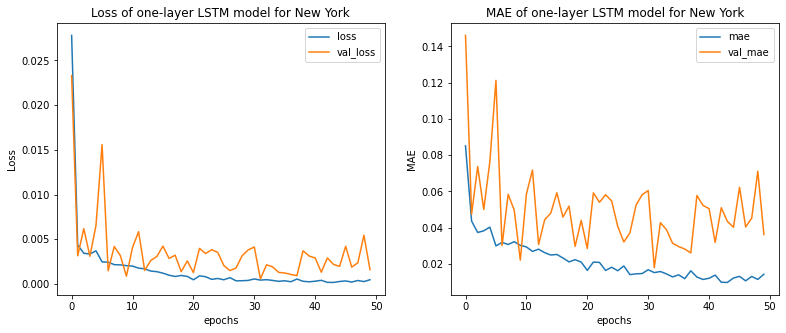

In [ ]:
# Plotting the loss and MAE graphs
# Plot training results
epochs=50
fig = plt.figure(figsize=(20,5))
axs = fig.add_subplot(1,3,1)
axs.set_title(f'Loss of one-layer LSTM model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["loss","val_loss"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')
axs.legend()

axs = fig.add_subplot(1,3,2)
axs.set_title(f'MAE of one-layer LSTM model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["mae","val_mae"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('MAE')
    axs.set_xlabel('epochs')
axs.legend()

plt.show()

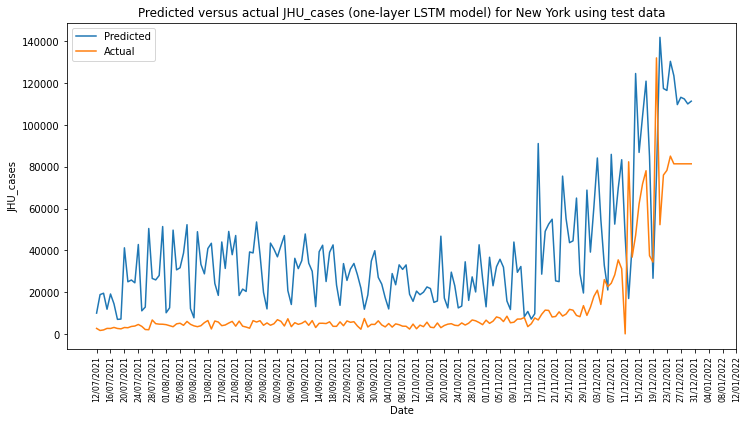

In [ ]:
# Predicting the y variable

# we are using inverse transform below to convert the minmax scaled y to the original cases
lstm_prediction = scaler_y.inverse_transform(model_lstm.predict(x_test))


#Transform date to string    
xtest_df=info_train_test[5]
dates=xtest_df["date"]
list_dates=[]
for i in dates:
    date=i.strftime("%d/%m/%Y")
    list_dates.append(date)
    
#Plot
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), lstm_prediction, label="Predicted")
plt.plot(range(len(y_test)),list(scaler_y.inverse_transform(y_test)), label="Actual")
plt.title(f"Predicted versus actual JHU_cases (one-layer LSTM model) for {file_names[info_sel_state[0]]} using test data")
plt.xticks(range(len(ytest))[::4], list_dates[::4], rotation ="vertical", fontsize= 8)
plt.xlabel("Date")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

The result of this baseline, one-layer model looks promising but not good enough.

In [ ]:
#Calculate mean MAE
mean_MAE=[]
for metric in ["mae","val_mae"]:
    mean_MAE.append(np.mean(history.history[metric]))

MAE_5=round(mean_MAE[0],4)
MAE_val_5=round(mean_MAE[1],4)

print("The MAE of the model is", MAE_5)
print("The validation MAE of the model is", MAE_val_5)


The MAE of the model is 0.0216
The validation MAE of the model is 0.0498


#### b) Multi-layer LSTM model
<a name="lstm_multi-model_ny"></a>


[Return to contents](#contents)  


Then we tested adding more layers. Below is the multi-layer LSTM model of the NY State, using time series.

In [ ]:
### Multilayer LSTM model
#Design following: Iberoamerican Journal of Medicine
tf.keras.backend.clear_session()

# input dimension below
input_dim = x_train.shape[1:]
n_units= 50

#Create model
model_lstm_input = tf.keras.Input(shape=input_dim)
model_hidden1=tf.keras.layers.LSTM(units = n_units, return_sequences=True)(model_lstm_input)
model_dropout1=tf.keras.layers.Dropout(rate=0.2)(model_hidden1)
model_hidden2=tf.keras.layers.LSTM(units = n_units, return_sequences=True)(model_dropout1)
model_dropout2=tf.keras.layers.Dropout(rate=0.2)(model_hidden2)
model_hidden3=tf.keras.layers.LSTM(units = n_units, return_sequences=False)(model_dropout2)
model_dropout3=tf.keras.layers.Dropout(rate=0.2)(model_hidden3)
model_lstm_output=tf.keras.layers.Dense(units = 1, activation="linear")(model_dropout3)
model_lstm = tf.keras.Model(inputs=model_lstm_input, outputs=model_lstm_output, name="model_lstm")

#Print the model architecture
print(model_lstm.summary())

#Compile model
model_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

#Convert x to tensor
x_train_tf = tf.convert_to_tensor(x_train, np.float32)

#Fit model
history = model_lstm.fit(x_train_tf, y_train, epochs = 50, validation_split=0.1, batch_size = 1, verbose=1)



Model: "model_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 498)]         0         
                                                                 
 lstm (LSTM)                 (None, 14, 50)            109800    
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

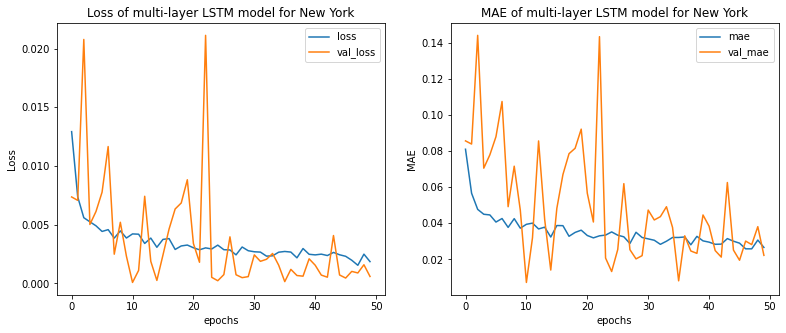

In [ ]:
# Plotting the loss and MAE graphs
# Plot training results
epochs=50
fig = plt.figure(figsize=(20,5))
axs = fig.add_subplot(1,3,1)
axs.set_title(f'Loss of multi-layer LSTM model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["loss","val_loss"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')
axs.legend()

axs = fig.add_subplot(1,3,2)
axs.set_title(f'MAE of multi-layer LSTM model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["mae","val_mae"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('MAE')
    axs.set_xlabel('epochs')
axs.legend()

plt.show()

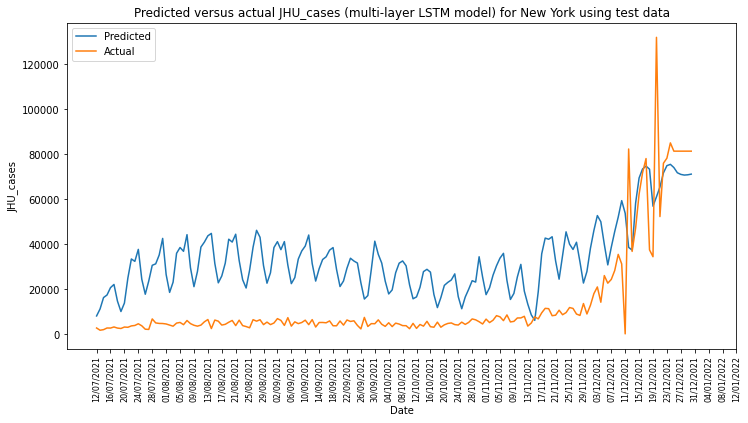

In [ ]:
# Predicting the y variable

# we are using inverse transform below to convert the minmax scaled y to the original cases
lstm_prediction = scaler_y.inverse_transform(model_lstm.predict(x_test))


#Transform date to string    
xtest_df=info_train_test[5]
dates=xtest_df["date"]
list_dates=[]
for i in dates:
    date=i.strftime("%d/%m/%Y")
    list_dates.append(date)
    
#Plot
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), lstm_prediction, label="Predicted")
plt.plot(range(len(y_test)),list(scaler_y.inverse_transform(y_test)), label="Actual")
plt.title(f"Predicted versus actual JHU_cases (multi-layer LSTM model) for {file_names[info_sel_state[0]]} using test data")
plt.xticks(range(len(ytest))[::4], list_dates[::4], rotation ="vertical", fontsize= 8)
plt.xlabel("Date")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

The prediction with the multi-layer model does not show much improvement over the previous one-layer model. We tried different values of the hyperparameters: number of units, optimizer, and longer training cycle. We also applied cross-validation without success.  

In [ ]:
#Calculate mean MAE
mean_MAE=[]
for metric in ["mae","val_mae"]:
    mean_MAE.append(np.mean(history.history[metric]))

MAE_6=round(mean_MAE[0],4)
MAE_val_6=round(mean_MAE[1],4)

print("The MAE of the model is", MAE_6)
print("The validation MAE of the model is", MAE_val_6)


The MAE of the model is 0.0353
The validation MAE of the model is 0.0493


#### c) Two-layer LSTM model Using Time Steps
<a name="lstm_multi_wo_ny"></a>

[Return to contents](#contents)  \

For the following models, we used time steps applying the use of a sliding window to the data. To feed the LSTM models, we pre-processed our train and test datasets as time step series with a look-back of 14 days and a horizon of one day in the future. Below is a two-layer LSTM using time steps applied to the NY state data. [8]

In [ ]:
# Function to create datasets for LSTM as time steps
def format_series(n_future,n_past,df):
  # Creates series of multi-step on the dataset based on n_past periods
  # and adds the corresponding predicted values based on n_future periods
    trainX=[]
    trainY=[]
    for i in range(n_past,len(df)-n_future+1):
        trainX.append(df.iloc[i-n_past:i,1:df.shape[1]])#All features except y
        trainY.append(df.iloc[i+n_future-1:i+n_future,0])#y

    return np.array(trainX),np.array(trainY)  

In [ ]:
#Using info New York
info_sel_state = sel_state("New York")
info_train_test=train_test("New York")

#x and y train and test variables
x_train=info_train_test[4]
x_train.drop(["date"], axis=1, inplace=True)
y_train=info_train_test[1]
x_test=info_train_test[5]
x_test.drop(["date"], axis=1, inplace=True)
y_test=info_train_test[3]

# Datasets shape
print("\nThe shape of xtrain is", x_train.shape)
print("The shape of ytrain is", y_train.shape)

print("\nThe shape of xtest is", x_test.shape)
print("The shape of ytest is", y_test.shape)



The shape of xtrain is (558, 499)
The shape of ytrain is (558,)

The shape of xtest is (186, 499)
The shape of ytest is (186,)


In [ ]:

# Generating Time Step Series
xtrain,ytrain = format_series(1,14,x_train) 
xtest,ytest = format_series(1,14,x_test) 

# Checking the test and train data shapes
print("\nThe shape of xtrain is", xtrain.shape)
print("The shape of ytrain is", ytrain.shape)

print("\nThe shape of xtest is", xtest.shape)
print("The shape of ytest is", ytest.shape)



The shape of xtrain is (544, 14, 498)
The shape of ytrain is (544, 1)

The shape of xtest is (172, 14, 498)
The shape of ytest is (172, 1)


In [ ]:
tf.keras.backend.clear_session()

n_units=64

# Model architecture with 2 LSTM layers
model_lstm_input = tf.keras.Input(shape=(xtrain.shape[1], xtrain.shape[2]))
model_hidden=tf.keras.layers.LSTM(units = n_units,    activation='relu', return_sequences=True)(model_lstm_input)
model_hidden=tf.keras.layers.LSTM(units = n_units//2, activation='relu', return_sequences=False)(model_hidden)
model_hidden=tf.keras.layers.Dropout(0.2)(model_hidden)
model_lstm_output=tf.keras.layers.Dense(units = 1)(model_hidden)

model_lstm_shift = tf.keras.Model(inputs=model_lstm_input, outputs=model_lstm_output, name="model_lstm_time_steps")

#Print the model architecture
print(model_lstm_shift.summary())

#Compile model
model_lstm_shift.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

#Fit model
model_lstm_shift_results=model_lstm_shift.fit(xtrain, ytrain, 
                                               validation_split=0.2, 
                                               epochs = 20,
                                               batch_size = 32)

#Predict with model
model_lstm_shift_predict=model_lstm_shift.predict(xtest)

Model: "model_lstm_time_steps"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 498)]         0         
                                                                 
 lstm (LSTM)                 (None, 14, 64)            144128    
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 156,577
Trainable params: 156,577
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
14/14 [================

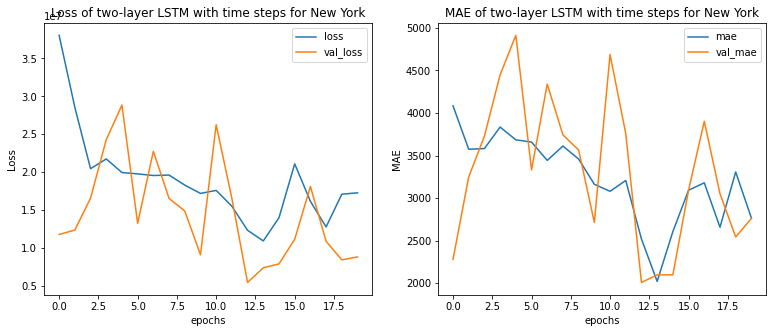

In [ ]:

# Plot training results
epochs=20
fig = plt.figure(figsize=(20,5))
axs = fig.add_subplot(1,3,1)
axs.set_title(f'Loss of two-layer LSTM with time steps for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["loss","val_loss"]:
    axs.plot(np.arange(0, epochs), model_lstm_shift_results.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')
axs.legend()

axs = fig.add_subplot(1,3,2)
axs.set_title(f'MAE of two-layer LSTM with time steps for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["mae","val_mae"]:
    axs.plot(np.arange(0, epochs), model_lstm_shift_results.history[metric], label=metric)
    axs.set_ylabel('MAE')
    axs.set_xlabel('epochs')
axs.legend()

plt.show()



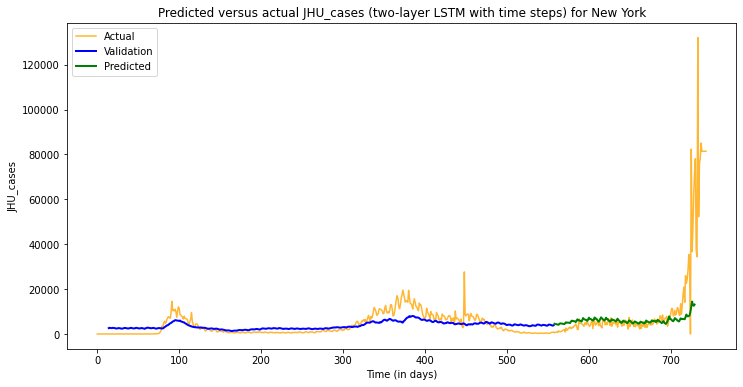

In [ ]:
#Plot actual vs. test and validation prediction
shift = 14
plt.figure(figsize=(12,6))
plt.plot(range(len(y_train)),y_train, label="Actual",color='orange',alpha=.8)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test,color='orange',alpha=.8)
plt.plot(range(shift,len(ytrain)+shift), model_lstm_shift.predict(xtrain), label="Validation",color='b',lw=2)
plt.plot(range(len(ytrain)+shift,len(ytrain)+len(ytest)+shift), model_lstm_shift.predict(xtest), label="Predicted",color='g',lw=2)
plt.title(f"Predicted versus actual JHU_cases (two-layer LSTM with time steps) for {file_names[info_sel_state[0]]}")
plt.xlabel("Time (in days)")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

The prediction result of the two-layer model, using time steps, looks very good as can be seen in the above graph. This graph compares the actual NY state observations versus the predicted data obtained applying the model on train data, in blue, and never test train data, in green. The predicted graph closely follows the actual data and predicts with reasonable accuracy.

In [ ]:
# Forecasting 14 days beyond our dataset
n_future=14
forecast = model_lstm_shift.predict(xtrain[-n_future:])

Stretching the results obtained with the two-layer model, we predicted two weeks beyond the dataset. A two-week forecast period is well supported because we used a look-back period with a window of 14 days.

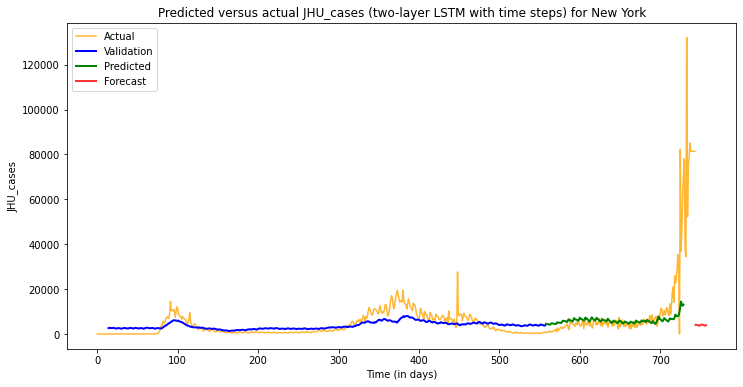

In [ ]:
#Plot actual vs. test and validation prediction
plt.figure(figsize=(12,6))
plt.plot(range(len(y_train)),y_train, label="Actual",color='orange',alpha=.8)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test,color='orange',alpha=.8)
plt.plot(range(shift,len(ytrain)+shift), model_lstm_shift.predict(xtrain), label="Validation",color='b',lw=2)
plt.plot(range(len(ytrain)+shift,len(ytrain)+len(ytest)+shift), model_lstm_shift.predict(xtest), label="Predicted",color='g',lw=2)
plt.plot(range(len(y_train)+len(y_test),len(y_train)+len(y_test)+len(forecast)),forecast,color='r',alpha=.8,lw=2,label="Forecast")
plt.title(f"Predicted versus actual JHU_cases (two-layer LSTM with time steps) for {file_names[info_sel_state[0]]}")
plt.xlabel("Time (in days)")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

The above graph for New York data is similar to the previous actual vs. predicted. This time we included a two-week forecast, red color, that shows a reduction in the number of COVID cases. The forecasted data is very close to what actually happened in NY at that time.

In [ ]:
#Calculate mean MAE
mean_MAE=[]
for metric in ["mae","val_mae"]:
    mean_MAE.append(np.mean(history.history[metric]))

MAE_7=round(mean_MAE[0],4)
MAE_val_7=round(mean_MAE[1],4)

print("The MAE of the model is", MAE_7)
print("The validation MAE of the model is", MAE_val_7)


The MAE of the model is 0.0353
The validation MAE of the model is 0.0493


#### d) Multi-layer LSTM model Using Time Steps
<a name="lstm_multi_wo_ny"></a>

[Return to contents](#contents)


As a logical forward step in trying to improve the previous results, we tested the same time steps approach on a multi-level LSTM model. [9]

In [ ]:
#Using info New York
info_sel_state = sel_state("New York")
info_train_test=train_test("New York")

#x and y train and test variables
x_train=info_train_test[4]
x_train.drop(["date"], axis=1, inplace=True)
y_train=info_train_test[1]
x_test=info_train_test[5]
x_test.drop(["date"], axis=1, inplace=True)
y_test=info_train_test[3]

# Datasets shape
print("\nThe shape of xtrain is", x_train.shape)
print("The shape of ytrain is", y_train.shape)

print("\nThe shape of xtest is", x_test.shape)
print("The shape of ytest is", y_test.shape)



The shape of xtrain is (558, 499)
The shape of ytrain is (558,)

The shape of xtest is (186, 499)
The shape of ytest is (186,)


In [ ]:

# Generating Time Step Series
xtrain,ytrain = format_series(1,14,x_train) 
xtest,ytest = format_series(1,14,x_test) 

# Checking the test and train data shapes
print("\nThe shape of xtrain is", xtrain.shape)
print("The shape of ytrain is", ytrain.shape)

print("\nThe shape of xtest is", xtest.shape)
print("The shape of ytest is", ytest.shape)



The shape of xtrain is (544, 14, 498)
The shape of ytrain is (544, 1)

The shape of xtest is (172, 14, 498)
The shape of ytest is (172, 1)


In [ ]:
tf.keras.backend.clear_session()

n_units=64

# Model architecture with 4 LSTM layers
model_lstm_input = tf.keras.Input(shape=(xtrain.shape[1], xtrain.shape[2]))
model_hidden=tf.keras.layers.LSTM(units = n_units,    activation='relu', return_sequences=True)(model_lstm_input)
model_hidden=tf.keras.layers.LSTM(units = n_units,    activation='relu', return_sequences=True)(model_hidden)
model_hidden=tf.keras.layers.LSTM(units = n_units,    activation='relu', return_sequences=True)(model_hidden)
model_hidden=tf.keras.layers.LSTM(units = n_units//2, activation='relu', return_sequences=False)(model_hidden)
model_hidden=tf.keras.layers.Dropout(0.2)(model_hidden)
model_lstm_output=tf.keras.layers.Dense(units = 1)(model_hidden)

model_lstm_shift = tf.keras.Model(inputs=model_lstm_input, outputs=model_lstm_output, name="model_lstm_time_steps")

#Print the model architecture
print(model_lstm_shift.summary())

#Compile model
model_lstm_shift.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

#Fit model
model_lstm_shift_results=model_lstm_shift.fit(xtrain, ytrain, 
                                               validation_split=0.2, 
                                               epochs = 50,
                                               batch_size = 32)

#Predict with model
model_lstm_shift_predict=model_lstm_shift.predict(xtest)

Model: "model_lstm_time_steps"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 498)]         0         
                                                                 
 lstm (LSTM)                 (None, 14, 64)            144128    
                                                                 
 lstm_1 (LSTM)               (None, 14, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 14, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)       

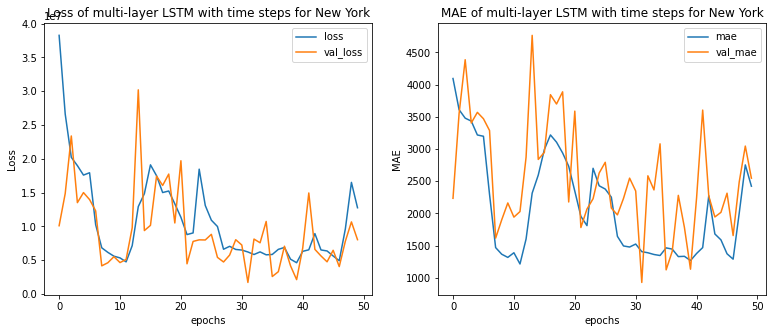

In [ ]:

# Plot training results
epochs=50
fig = plt.figure(figsize=(20,5))
axs = fig.add_subplot(1,3,1)
axs.set_title(f'Loss of multi-layer LSTM with time steps for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["loss","val_loss"]:
    axs.plot(np.arange(0, epochs), model_lstm_shift_results.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')
axs.legend()

axs = fig.add_subplot(1,3,2)
axs.set_title(f'MAE of multi-layer LSTM with time steps for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["mae","val_mae"]:
    axs.plot(np.arange(0, epochs), model_lstm_shift_results.history[metric], label=metric)
    axs.set_ylabel('MAE')
    axs.set_xlabel('epochs')
axs.legend()

plt.show()


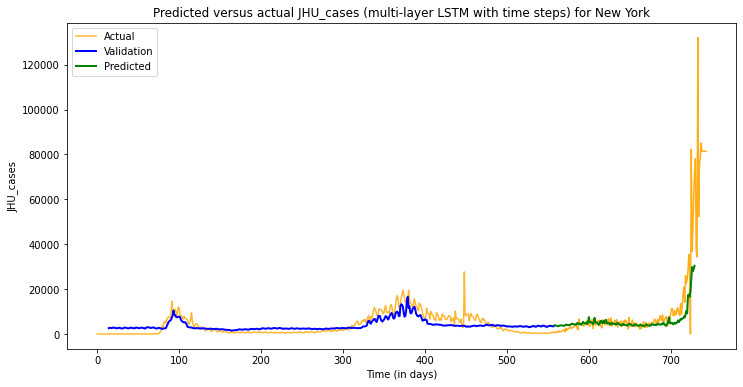

In [ ]:
#Plot actual vs. test and validation prediction
shift = 14
plt.figure(figsize=(12,6))
plt.plot(range(len(y_train)),y_train, label="Actual",color='orange',alpha=.8)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test,color='orange',alpha=.9)
plt.plot(range(shift,len(ytrain)+shift), model_lstm_shift.predict(xtrain), label="Validation",color='b',lw=2)
plt.plot(range(len(ytrain)+shift,len(ytrain)+len(ytest)+shift), model_lstm_shift.predict(xtest), label="Predicted",color='g',lw=2)
plt.title(f"Predicted versus actual JHU_cases (multi-layer LSTM with time steps) for {file_names[info_sel_state[0]]}")
plt.xlabel("Time (in days)")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

The prediction result of the multi-layer model, using time steps, looks very good as can be seen in the above graph. This graph compares the actual NY state observations versus the predicted data obtained applying the model on train data, in blue, and never seen test data, in green. The predicted graph closely follows the actual data and predicts with reasonable accuracy.

In [ ]:
# Forecasting 14 days beyond our dataset
n_future=14
forecast = model_lstm_shift.predict(xtrain[-n_future:])

Stretching the results obtained with the two-layer model, we predicted two weeks beyond the dataset. A two-week forecast period is well supported because we used a look-back period with a window of 14 days.

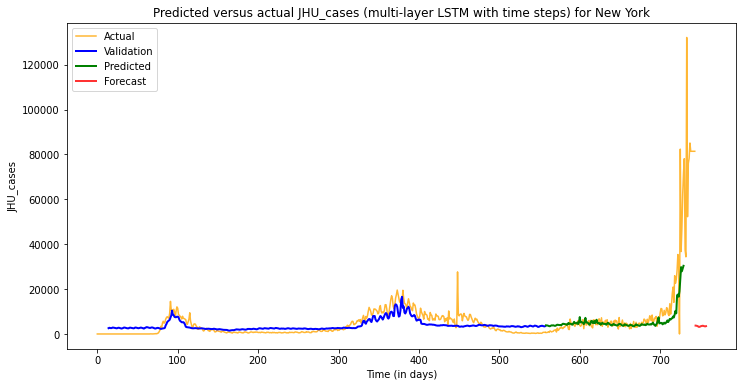

In [ ]:
#Plot actual vs. test and validation prediction
plt.figure(figsize=(12,6))
plt.plot(range(len(y_train)),y_train, label="Actual",color='orange',alpha=.8)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test,color='orange',alpha=.8)
plt.plot(range(shift,len(ytrain)+shift), model_lstm_shift.predict(xtrain), label="Validation",color='b',lw=2)
plt.plot(range(len(ytrain)+shift,len(ytrain)+len(ytest)+shift), model_lstm_shift.predict(xtest), label="Predicted",color='g',lw=2)
plt.plot(range(len(y_train)+len(y_test),len(y_train)+len(y_test)+len(forecast)),forecast,color='r',alpha=.8,lw=2,label="Forecast")
plt.title(f"Predicted versus actual JHU_cases (multi-layer LSTM with time steps) for {file_names[info_sel_state[0]]}")
plt.xlabel("Time (in days)")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

The above graph for New York data is similar to the previous actual vs. predicted. This time we included a two-week forecast, red color, that shows a reduction in the number of COVID cases. The forecasted data is very close to what actually happened in NY at that time.

In [ ]:
#Calculate mean MAE
mean_MAE=[]
for metric in ["mae","val_mae"]:
    mean_MAE.append(np.mean(history.history[metric]))

MAE_8=round(mean_MAE[0],4)
MAE_val_8=round(mean_MAE[1],4)

print("The MAE of the model is", MAE_8)
print("The validation MAE of the model is", MAE_val_8)


The MAE of the model is 0.0353
The validation MAE of the model is 0.0493


### 4.7.2 California<a name="lstm_cal"></a>


[Return to contents](#contents)  


#### a) One layer LSTM model
<a name="lstm_model_cal"></a>


[Return to contents](#contents)  

As we did with NY data, for California, we started with a one-layer model, applying our train and test datasets as time series. Below is the naive LSTM model of the NY State, using one layer as a baseline model.

In [ ]:
tf.keras.backend.clear_session()

# Using info New York
info_sel_state = sel_state("California")
info_train_test=train_test("California")

# Scaler
scaler_y = MinMaxScaler(feature_range=(0, 1))

# minmax scaler for y, scaling between 0 and 1
ytrain = info_train_test[1].to_numpy().reshape(-1,1)
ytrain = scaler_y.fit_transform(ytrain)
ytest  = info_train_test[3].to_numpy().reshape(-1,1)
ytest  = scaler_y.fit_transform(ytest)

#Call x variables
xtrain=info_train_test[4]
xtrain.drop(["date", "JHU_cases"], axis=1, inplace=True)
xtest=info_train_test[5].copy()
xtest.drop(["date", "JHU_cases"], axis=1, inplace=True)

# time series generator uses 14 day block to predict the next day 
train_gen = TimeseriesGenerator(xtrain.to_numpy(), ytrain,
                               length=14, sampling_rate=1,  
                                batch_size = 558)

test_gen = TimeseriesGenerator(xtest.to_numpy(), ytest,
                                length=14, sampling_rate=1, 
                               batch_size = 186)

# Below we are creating x and y train and test variable from the generators
x_train, y_train = train_gen[0]
# x_val, y_val = val_gen[0]
x_test, y_test = test_gen[0]

print('x train shape is :', x_train.shape)
print('y train shape is :', y_train.shape)
print('x test shape is :' , x_test.shape)
print('y test shape is :' , y_test.shape)


x train shape is : (544, 14, 498)
y train shape is : (544, 1)
x test shape is : (172, 14, 498)
y test shape is : (172, 1)


In [ ]:
# input dimension below
input_dim = x_train.shape[1:]
n_units = 100

#Create model
model_lstm_input = tf.keras.Input(shape=input_dim)
model_hidden=tf.keras.layers.LSTM(units = n_units)(model_lstm_input)
model_lstm_output=tf.keras.layers.Dense(units = 1, activation="linear")(model_hidden)
model_lstm = tf.keras.Model(inputs=model_lstm_input, outputs=model_lstm_output, name="model_lstm")


#Print the model architecture
print(model_lstm.summary())

#Compile model
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'mse', metrics=['mae'])

#Convert x to tensor
x_train_tf = tf.convert_to_tensor(x_train, np.float32)

#Fit model
history = model_lstm.fit(x_train_tf, y_train, epochs = 50, validation_split=0.1, batch_size = 1, verbose=1)

Model: "model_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 498)]         0         
                                                                 
 lstm (LSTM)                 (None, 100)               239600    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 239,701
Trainable params: 239,701
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
489/489 [==============================] - 8s 13ms/step - loss: 0.0242 - mae: 0.0858 - val_loss: 0.0010 - val_mae: 0.0243
Epoch 2/50
489/489 [==============================] - 6s 13ms/step - loss: 0.0050 - mae: 0.0500 - val_loss: 0.0098 - val_mae: 0.0934
Epoch 3/50
489/489 [=======================

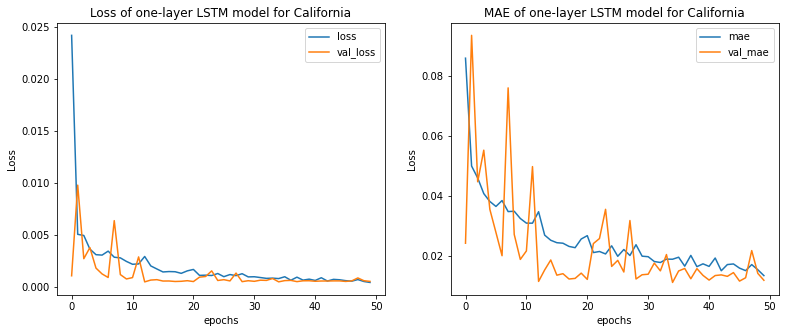

In [ ]:
# Plotting the MSE and MAE graphs
# Plot training results
epochs=50
fig = plt.figure(figsize=(20,5))
axs = fig.add_subplot(1,3,1)
axs.set_title(f'Loss of one-layer LSTM model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["loss","val_loss"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')
axs.legend()

axs = fig.add_subplot(1,3,2)
axs.set_title(f'MAE of one-layer LSTM model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["mae","val_mae"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')

axs.legend()

plt.show()

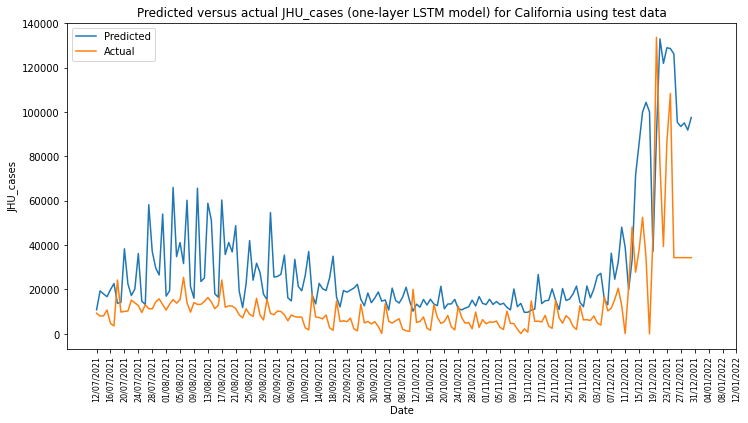

In [ ]:
# Predicting the y variable

# we are using inverse transform below to convert the minmax scaled y to the original cases
lstm_prediction = scaler_y.inverse_transform(model_lstm.predict(x_test))


#Transform date to string    
xtest_df=info_train_test[5]
dates=xtest_df["date"]
list_dates=[]
for i in dates:
    date=i.strftime("%d/%m/%Y")
    list_dates.append(date)
    
#Plot
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), lstm_prediction, label="Predicted")
plt.plot(range(len(y_test)),list(scaler_y.inverse_transform(y_test)), label="Actual")
plt.title(f"Predicted versus actual JHU_cases (one-layer LSTM model) for {file_names[info_sel_state[0]]} using test data")
plt.xticks(range(len(ytest))[::4], list_dates[::4], rotation ="vertical", fontsize= 8)
plt.xlabel("Date")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

The result of this baseline, one-layer model again looks promising but not good enough.

In [ ]:
#Calculate mean MAE
mean_MAE=[]
for metric in ["mae","val_mae"]:
    mean_MAE.append(np.mean(history.history[metric]))

MAE_9=round(mean_MAE[0],4)
MAE_val_9=round(mean_MAE[1],4)

print("The MAE of the model is", MAE_9)
print("The validation MAE of the model is", MAE_val_9)


The MAE of the model is 0.0255
The validation MAE of the model is 0.0221


#### b) Multi-layer LSTM model
<a name="lstm_multi-model_cal"></a>


[Return to contents](#contents)  

Then we tested adding more layers. Below is the multi-layer LSTM model of the State of California, using time series.

In [ ]:
### Multilayer LSTM model
#Design following: Iberoamerican Journal of Medicine
tf.keras.backend.clear_session()

# input dimension below
input_dim = x_train.shape[1:]
n_units= 50

#Create model
model_lstm_input = tf.keras.Input(shape=input_dim)
model_hidden1=tf.keras.layers.LSTM(units = n_units, return_sequences=True)(model_lstm_input)
model_dropout1=tf.keras.layers.Dropout(rate=0.2)(model_hidden1)
model_hidden2=tf.keras.layers.LSTM(units = n_units, return_sequences=True)(model_dropout1)
model_dropout2=tf.keras.layers.Dropout(rate=0.2)(model_hidden2)
model_hidden3=tf.keras.layers.LSTM(units = n_units, return_sequences=False)(model_dropout2)
model_dropout3=tf.keras.layers.Dropout(rate=0.2)(model_hidden3)
model_lstm_output=tf.keras.layers.Dense(units = 1, activation="linear")(model_dropout3)
model_lstm = tf.keras.Model(inputs=model_lstm_input, outputs=model_lstm_output, name="model_lstm")

#Print the model architecture
print(model_lstm.summary())

#Compile model
model_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

#Convert x to tensor
x_train_tf = tf.convert_to_tensor(x_train, np.float32)

#Fit model
history = model_lstm.fit(x_train_tf, y_train, epochs = 50, validation_split=0.1, batch_size = 1, verbose=1)



Model: "model_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 498)]         0         
                                                                 
 lstm (LSTM)                 (None, 14, 50)            109800    
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

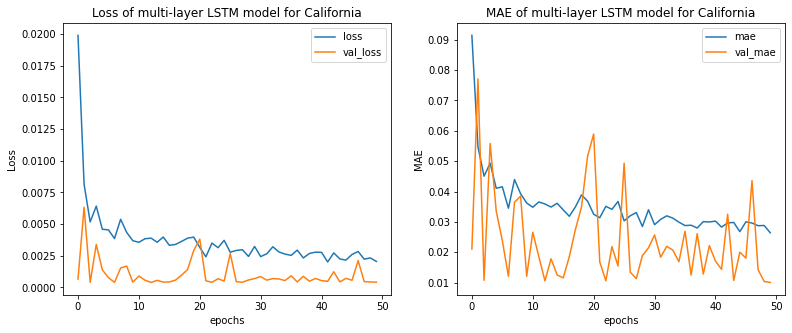

In [ ]:
# Plotting the MSE and MAE graphs
# Plot training results
epochs=50
fig = plt.figure(figsize=(20,5))
axs = fig.add_subplot(1,3,1)
axs.set_title(f'Loss of multi-layer LSTM model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["loss","val_loss"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')
axs.legend()

axs = fig.add_subplot(1,3,2)
axs.set_title(f'MAE of multi-layer LSTM model for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["mae","val_mae"]:
    axs.plot(np.arange(0, epochs), history.history[metric], label=metric)
    axs.set_ylabel('MAE')
    axs.set_xlabel('epochs')
axs.legend()

plt.show()

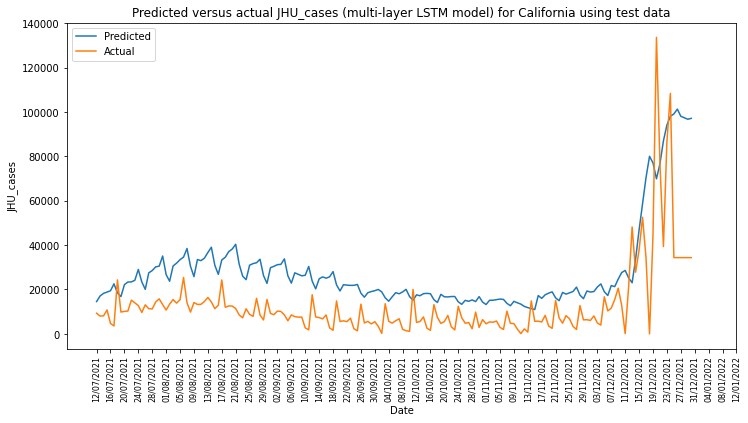

In [ ]:
# Predicting the y variable

# we are using inverse transform below to convert the minmax scaled y to the original cases
lstm_prediction = scaler_y.inverse_transform(model_lstm.predict(x_test))


#Transform date to string    
xtest_df=info_train_test[5]
dates=xtest_df["date"]
list_dates=[]
for i in dates:
    date=i.strftime("%d/%m/%Y")
    list_dates.append(date)
    
#Plot
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), lstm_prediction, label="Predicted")
plt.plot(range(len(y_test)),list(scaler_y.inverse_transform(y_test)), label="Actual")
plt.title(f"Predicted versus actual JHU_cases (multi-layer LSTM model) for {file_names[info_sel_state[0]]} using test data")
plt.xticks(range(len(ytest))[::4], list_dates[::4], rotation ="vertical", fontsize= 8)
plt.xlabel("Date")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

The prediction with the multi-layer model does not show much improvement over the previous one-layer model. We tried different values of the hyperparameters: number of units, optimizer, and longer training cycle. We also applied cross-validation without success.

In [ ]:
#Calculate mean MAE
mean_MAE=[]
for metric in ["mae","val_mae"]:
    mean_MAE.append(np.mean(history.history[metric]))

MAE_10=round(mean_MAE[0],4)
MAE_val_10=round(mean_MAE[1],4)

print("The MAE of the model is", MAE_10)
print("The validation MAE of the model is", MAE_val_10)


The MAE of the model is 0.0349
The validation MAE of the model is 0.0237


#### c) Two-layer LSTM model Using Time Steps
<a name="lstm_multi_wo_ny"></a>

[Return to contents](#contents)  \

For the following California models, we used time steps applying the use of a sliding window to the data, as we did with NY data. To feed the LSTM models, we pre-processed our train and test datasets as time step series with a look-back of 14 days and a horizon of one day in the future. Below is a two-layer LSTM using time steps applied to the State of California data. [8]

In [ ]:
#Using info New York
info_sel_state = sel_state("California")
info_train_test=train_test("California")

#x and y train and test variables
x_train=info_train_test[4]
x_train.drop(["date"], axis=1, inplace=True)
y_train=info_train_test[1]
x_test=info_train_test[5]
x_test.drop(["date"], axis=1, inplace=True)
y_test=info_train_test[3]

# Datasets shape
print("\nThe shape of xtrain is", x_train.shape)
print("The shape of ytrain is", y_train.shape)

print("\nThe shape of xtest is", x_test.shape)
print("The shape of ytest is", y_test.shape)



The shape of xtrain is (558, 499)
The shape of ytrain is (558,)

The shape of xtest is (186, 499)
The shape of ytest is (186,)


In [ ]:
# Function to create datasets for LSTM as time steps
def format_series(n_future,n_past,df):
  # Creates series of multi-step on the dataset based on n_past periods
  # and adds the corresponding predicted values based on n_future periods
    trainX=[]
    trainY=[]
    for i in range(n_past,len(df)-n_future+1):
        trainX.append(df.iloc[i-n_past:i,1:df.shape[1]])#All features except y
        trainY.append(df.iloc[i+n_future-1:i+n_future,0])#y

    return np.array(trainX),np.array(trainY)  

In [ ]:

# Generating Time Step Series
xtrain,ytrain = format_series(1,14,x_train) 
xtest,ytest = format_series(1,14,x_test) 

# Checking the test and train data shapes
print("\nThe shape of xtrain is", xtrain.shape)
print("The shape of ytrain is", ytrain.shape)

print("\nThe shape of xtest is", xtest.shape)
print("The shape of ytest is", ytest.shape)



The shape of xtrain is (544, 14, 498)
The shape of ytrain is (544, 1)

The shape of xtest is (172, 14, 498)
The shape of ytest is (172, 1)


In [ ]:
tf.keras.backend.clear_session()

n_units=64

# Model architecture with 2 LSTM layers
model_lstm_input = tf.keras.Input(shape=(xtrain.shape[1], xtrain.shape[2]))
model_hidden=tf.keras.layers.LSTM(units = n_units,    activation='relu', return_sequences=True)(model_lstm_input)
model_hidden=tf.keras.layers.LSTM(units = n_units//2, activation='relu', return_sequences=False)(model_hidden)
model_hidden=tf.keras.layers.Dropout(0.2)(model_hidden)
model_lstm_output=tf.keras.layers.Dense(units = 1)(model_hidden)

model_lstm_shift = tf.keras.Model(inputs=model_lstm_input, outputs=model_lstm_output, name="model_lstm_time_steps")

#Print the model architecture
print(model_lstm_shift.summary())

#Compile model
model_lstm_shift.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

#Fit model
model_lstm_shift_results=model_lstm_shift.fit(xtrain, ytrain, 
                                               validation_split=0.2, 
                                               epochs = 50,
                                               batch_size = 32)

#Predict with model
model_lstm_shift_predict=model_lstm_shift.predict(xtest)

Model: "model_lstm_time_steps"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 498)]         0         
                                                                 
 lstm (LSTM)                 (None, 14, 64)            144128    
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 156,577
Trainable params: 156,577
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
14/14 [================

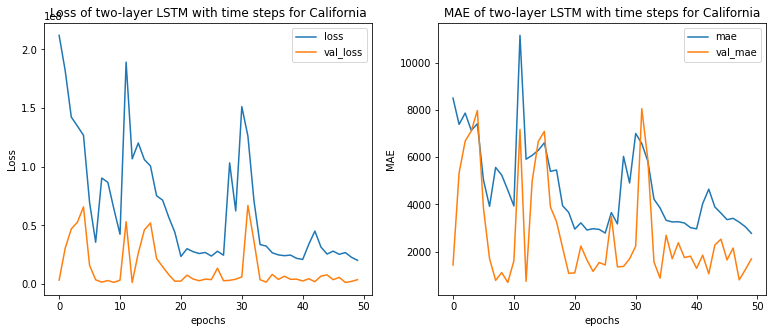

In [ ]:

# Plot training results
epochs=50
fig = plt.figure(figsize=(20,5))
axs = fig.add_subplot(1,3,1)
axs.set_title(f'Loss of two-layer LSTM with time steps for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["loss","val_loss"]:
    axs.plot(np.arange(0, epochs), model_lstm_shift_results.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')
axs.legend()

axs = fig.add_subplot(1,3,2)
axs.set_title(f'MAE of two-layer LSTM with time steps for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["mae","val_mae"]:
    axs.plot(np.arange(0, epochs), model_lstm_shift_results.history[metric], label=metric)
    axs.set_ylabel('MAE')
    axs.set_xlabel('epochs')
axs.legend()

plt.show()

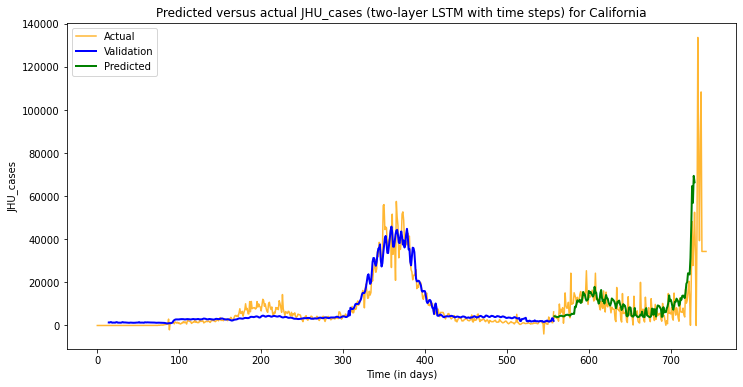

In [ ]:
#Plot actual vs. test and validation prediction
shift = 14
plt.figure(figsize=(12,6))
plt.plot(range(len(y_train)),y_train, label="Actual",color='orange',alpha=.8)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test,color='orange',alpha=.8)
plt.plot(range(shift,len(ytrain)+shift), model_lstm_shift.predict(xtrain), label="Validation",color='b',lw=2)
plt.plot(range(len(ytrain)+shift,len(ytrain)+len(ytest)+shift), model_lstm_shift.predict(xtest), label="Predicted",color='g',lw=2)
plt.title(f"Predicted versus actual JHU_cases (two-layer LSTM with time steps) for {file_names[info_sel_state[0]]}")
plt.xlabel("Time (in days)")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

The prediction result of the two-layer model, using time steps, looks very good as can be seen in the above graph. This graph compares the actual State of California observations versus the predicted data obtained applying the model on train data, in blue, and never seen test data, in green. The predicted graph closely follows the actual data and predicts with reasonable accuracy.

In [ ]:
# Forecasting 14 days beyond our dataset
n_future=14
forecast = model_lstm_shift.predict(xtrain[-n_future:])

Stretching the results obtained with the two-layer model, we predicted two weeks beyond our dataset. A two-week forecast period is well supported because we used a look-back period with a window of 14 days.

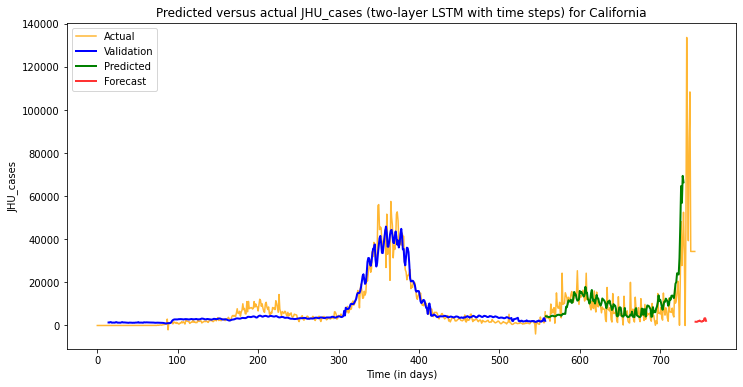

In [ ]:
#Plot actual vs. test and validation prediction
plt.figure(figsize=(12,6))
plt.plot(range(len(y_train)),y_train, label="Actual",color='orange',alpha=.8)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test,color='orange',alpha=.8)
plt.plot(range(shift,len(ytrain)+shift), model_lstm_shift.predict(xtrain), label="Validation",color='b',lw=2)
plt.plot(range(len(ytrain)+shift,len(ytrain)+len(ytest)+shift), model_lstm_shift.predict(xtest), label="Predicted",color='g',lw=2)
plt.plot(range(len(y_train)+len(y_test),len(y_train)+len(y_test)+len(forecast)),forecast,color='r',alpha=.8,lw=2,label="Forecast")
plt.title(f"Predicted versus actual JHU_cases (two-layer LSTM with time steps) for {file_names[info_sel_state[0]]}")
plt.xlabel("Time (in days)")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

The above graph for California data is similar to the previous actual vs. predicted. This time we included a two-week forecast, red color, that shows a reduction in the COVID cases number. The forecasted data is very close to what actually happened in California at that time.

In [ ]:
#Calculate mean MAE
mean_MAE=[]
for metric in ["mae","val_mae"]:
    mean_MAE.append(np.mean(history.history[metric]))

MAE_11=round(mean_MAE[0],4)
MAE_val_11=round(mean_MAE[1],4)

print("The MAE of the model is", MAE_11)
print("The validation MAE of the model is", MAE_val_11)


The MAE of the model is 0.0349
The validation MAE of the model is 0.0237


#### d) Multi-layer LSTM model Using Time Steps
<a name="lstm_multi_wo_ny"></a>

[Return to contents](#contents)


As a logical forward step in trying to improve the previous results, we tested the same time steps approach on a multi-level LSTM model. [9]

In [ ]:
#Using info New York
info_sel_state = sel_state("California")
info_train_test=train_test("California")

#x and y train and test variables
x_train=info_train_test[4]
x_train.drop(["date"], axis=1, inplace=True)
y_train=info_train_test[1]
x_test=info_train_test[5]
x_test.drop(["date"], axis=1, inplace=True)
y_test=info_train_test[3]

# Datasets shape
print("\nThe shape of xtrain is", x_train.shape)
print("The shape of ytrain is", y_train.shape)

print("\nThe shape of xtest is", x_test.shape)
print("The shape of ytest is", y_test.shape)



The shape of xtrain is (558, 499)
The shape of ytrain is (558,)

The shape of xtest is (186, 499)
The shape of ytest is (186,)


In [ ]:

# Generating Time Step Series
xtrain,ytrain = format_series(1,14,x_train) 
xtest,ytest = format_series(1,14,x_test) 

# Checking the test and train data shapes
print("\nThe shape of xtrain is", xtrain.shape)
print("The shape of ytrain is", ytrain.shape)

print("\nThe shape of xtest is", xtest.shape)
print("The shape of ytest is", ytest.shape)



The shape of xtrain is (544, 14, 498)
The shape of ytrain is (544, 1)

The shape of xtest is (172, 14, 498)
The shape of ytest is (172, 1)


In [ ]:
tf.keras.backend.clear_session()

n_units=64

# Model architecture with 4 LSTM layers
model_lstm_input = tf.keras.Input(shape=(xtrain.shape[1], xtrain.shape[2]))
model_hidden=tf.keras.layers.LSTM(units = n_units,    activation='relu', return_sequences=True)(model_lstm_input)
model_hidden=tf.keras.layers.LSTM(units = n_units,    activation='relu', return_sequences=True)(model_hidden)
model_hidden=tf.keras.layers.LSTM(units = n_units,    activation='relu', return_sequences=True)(model_hidden)
model_hidden=tf.keras.layers.LSTM(units = n_units//2, activation='relu', return_sequences=False)(model_hidden)
model_hidden=tf.keras.layers.Dropout(0.2)(model_hidden)
model_lstm_output=tf.keras.layers.Dense(units = 1)(model_hidden)

model_lstm_shift = tf.keras.Model(inputs=model_lstm_input, outputs=model_lstm_output, name="model_lstm_time_steps")

#Print the model architecture
print(model_lstm_shift.summary())

#Compile model
model_lstm_shift.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

#Fit model
model_lstm_shift_results=model_lstm_shift.fit(xtrain, ytrain, 
                                               validation_split=0.2, 
                                               epochs = 20,
                                               batch_size = 32)

#Predict with model
model_lstm_shift_predict=model_lstm_shift.predict(xtest)

Model: "model_lstm_time_steps"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 498)]         0         
                                                                 
 lstm (LSTM)                 (None, 14, 64)            144128    
                                                                 
 lstm_1 (LSTM)               (None, 14, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 14, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)       

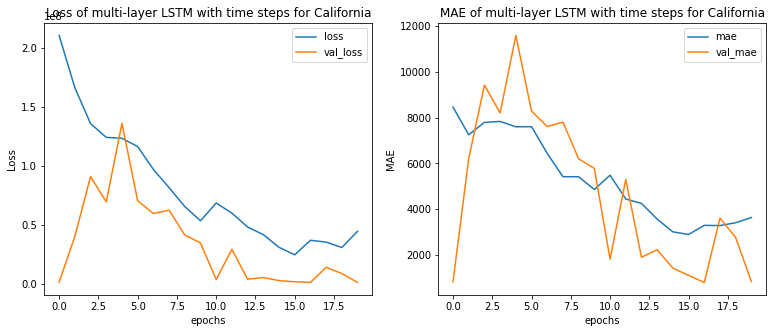

In [ ]:

# Plot training results
epochs=20
fig = plt.figure(figsize=(20,5))
axs = fig.add_subplot(1,3,1)
axs.set_title(f'Loss of multi-layer LSTM with time steps for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["loss","val_loss"]:
    axs.plot(np.arange(0, epochs), model_lstm_shift_results.history[metric], label=metric)
    axs.set_ylabel('Loss')
    axs.set_xlabel('epochs')
axs.legend()

axs = fig.add_subplot(1,3,2)
axs.set_title(f'MAE of multi-layer LSTM with time steps for {file_names[info_sel_state[0]]}')
# Plot all metrics
for metric in ["mae","val_mae"]:
    axs.plot(np.arange(0, epochs), model_lstm_shift_results.history[metric], label=metric)
    axs.set_ylabel('MAE')
    axs.set_xlabel('epochs')

axs.legend()

plt.show()

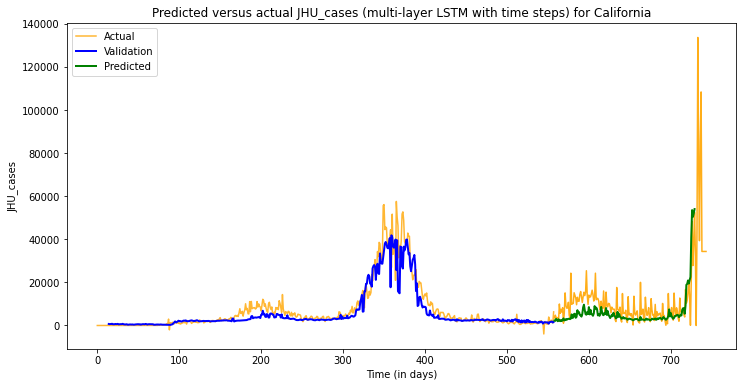

In [ ]:
#Plot actual vs. test and validation prediction
shift = 14
plt.figure(figsize=(12,6))
plt.plot(range(len(y_train)),y_train, label="Actual",color='orange',alpha=.8)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test,color='orange',alpha=.9)
plt.plot(range(shift,len(ytrain)+shift), model_lstm_shift.predict(xtrain), label="Validation",color='b',lw=2)
plt.plot(range(len(ytrain)+shift,len(ytrain)+len(ytest)+shift), model_lstm_shift.predict(xtest), label="Predicted",color='g',lw=2)
plt.title(f"Predicted versus actual JHU_cases (multi-layer LSTM with time steps) for {file_names[info_sel_state[0]]}")
plt.xlabel("Time (in days)")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

The prediction result of the multi-layer model, using time steps, looks very good as can be seen in the above graph. This graph compares the actual State of California observations versus the predicted data obtained applying the model on train data, in blue, and never seen test data, in green. The predicted graph closely follows the actual data and predicts with reasonable accuracy.

In [ ]:
# Forecasting 14 days beyond our dataset
n_future=14
forecast = model_lstm_shift.predict(xtrain[-n_future:])

Stretching the results obtained with the two-layer model, we predicted two weeks beyond the dataset. A two-week forecast period is well supported because we used a look-back period with a window of 14 days.

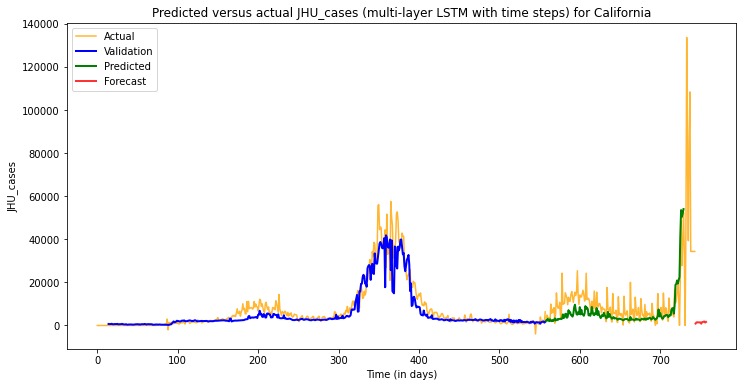

In [ ]:
#Plot actual vs. test and validation prediction
plt.figure(figsize=(12,6))
plt.plot(range(len(y_train)),y_train, label="Actual",color='orange',alpha=.8)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test,color='orange',alpha=.8)
plt.plot(range(shift,len(ytrain)+shift), model_lstm_shift.predict(xtrain), label="Validation",color='b',lw=2)
plt.plot(range(len(ytrain)+shift,len(ytrain)+len(ytest)+shift), model_lstm_shift.predict(xtest), label="Predicted",color='g',lw=2)
plt.plot(range(len(y_train)+len(y_test),len(y_train)+len(y_test)+len(forecast)),forecast,color='r',alpha=.8,lw=2,label="Forecast")
plt.title(f"Predicted versus actual JHU_cases (multi-layer LSTM with time steps) for {file_names[info_sel_state[0]]}")
plt.xlabel("Time (in days)")
plt.ylabel("JHU_cases")
plt.legend()
plt.show()

The above graph for California data is similar to the previous actual vs. predicted. This time we included a two-week forecast, red color, that shows a reduction in the number of COVID cases. The forecasted data is very close to what actually happened in California at that time.

In [ ]:
#Calculate mean MAE
mean_MAE=[]
for metric in ["mae","val_mae"]:
    mean_MAE.append(np.mean(history.history[metric]))

MAE_12=round(mean_MAE[0],4)
MAE_val_12=round(mean_MAE[1],4)

print("The MAE of the model is", MAE_12)
print("The validation MAE of the model is", MAE_val_12)


The MAE of the model is 0.0349
The validation MAE of the model is 0.0237


# V. Conclusions and way forward<a name="conclusions"></a>

[Return to contents](#contents)

In [ ]:
#Summary table of performance of models

#For validation data
pd.set_option('display.float_format', lambda x: '%.4f' % x)

table_names=["ARMA", "One-layer RNN", "Multi-layer RNN", "One-layer LSTM", "Multi-layer LSTM",
             "Two-layer LSTM w/ time steps", "Multi-layer LSTM w/ time steps"]
table_values_ny=[MAE_0_ny, MAE_val_1,MAE_val_2,MAE_val_5,MAE_val_6,MAE_val_7,MAE_val_8]
table_values_cal=[MAE_0_cal, MAE_val_3, MAE_val_4,MAE_val_9,MAE_val_10,MAE_val_11,MAE_val_12]

table_mae = pd.DataFrame(list(zip(table_values_ny, table_values_cal)),
               columns =['New York', 'California'], index=table_names)

table_mae.index.name = 'MAE values'

print("The validation mean absolute error (MAE) of the different models included in this notebook are below:\n")
print(table_mae)

#For train data

table_values_ny=[MAE_0_ny, MAE_1,MAE_2,MAE_5,MAE_6,MAE_7,MAE_8]
table_values_cal=[MAE_0_cal, MAE_3, MAE_4,MAE_9,MAE_10,MAE_11,MAE_12]

table_mae = pd.DataFrame(list(zip(table_values_ny, table_values_cal)),
               columns =['New York', 'California'], index=table_names)

table_mae.index.name = 'MAE values'

print("\n\nThe train mean absolute error (MAE) of the different models included in this notebook are below:\n")
print(table_mae)


The validation mean absolute error (MAE) of the different models included in this notebook are below:

                                New York  California
MAE values                                          
ARMA                              0.1295      0.0658
One-layer RNN                     0.0602      0.0430
Multi-layer RNN                   0.0817      0.0544
One-layer LSTM                    0.0498      0.0221
Multi-layer LSTM                  0.0493      0.0237
Two-layer LSTM w/ time steps      0.0493      0.0237
Multi-layer LSTM w/ time steps    0.0493      0.0237


The train mean absolute error (MAE) of the different models included in this notebook are below:

                                New York  California
MAE values                                          
ARMA                              0.1295      0.0658
One-layer RNN                     0.0408      0.0446
Multi-layer RNN                   0.0601      0.0715
One-layer LSTM                    0.0216      0.0255
Mu

The LSTM models performed better than the RNN models and the baseline ARMA models. However, the MAE results are similar for the LSTM and RNN models. The reason why is that the MAE averages all the errors. So, the LSTM models were close to the actual values, but largely missed the mark at the end tail. Conversely, the RNN models did not perform well in any segment of the time series but did not largely missed any mark. As the MAE averages all errors, then the MAE values are similar for the LSTM and RNN models. Future work should involve using additional  metrics to measure performance (for example, root mean squared errors or RMSE, which uses the standard deviation and measures how spread are the residuals) and further tune the models to improve their prediction.


# VI. References<a name="references"></a>

[Return to contents](#contents)

**References used in the background and introduction (Section I):**

(1) Lopreite et al. 2021. “Early warnings of COVID-19 outbreaks across Europe from social media”. Scientific Reports 11 (2147).   
(2) Kogan et al. 2021. “An early warning approach to monitor COVID-19 activity with multiple digital traces in near real time”. Science Advances: 7.
<br>
<br>
**References used in the introduction of the model results and discussion (Section IV):**   
(1) Wei et al. 2020. "The role of absolute humidity in the transmission of COVID-19" SPH Scholarly Articles. Harvard University.  
(2) Committee to Unleash Prosperity. 2020. "Grading our governors. A report card on reopening states' economies". 
<br>
<br>
**References used in the read files (Sub-section 4.2):**   
(1) https://www.geeksforgeeks.org/how-to-read-all-csv-files-in-a-folder-in-pandas/
<br>
<br>
**References used in the times series baseline model (Sub-section 4.5):**

(1) https://www.datacamp.com/community/tutorials/moving-averages-in-pandas 
  
(2) https://www.datacamp.com/community/tutorials/moving-averages-in-pandas 

(3) https://www.datacamp.com/community/tutorials/moving-averages-in-pandas   

(4) https://www.linkedin.com/pulse/what-mape-mad-msd-time-series-allameh-statistics/ 

(5) https://towardsdatascience.com/defining-the-moving-average-model-for-time-series-forecasting-in-python-626781db2502

(6) https://www.projectpro.io/recipesforecast-moving-averages-for-time-series

(7) https://www.mikulskibartosz.name/nested-cross-validation-in-time-series-forecasting-using-scikit-learn-and-statsmodels/

(8) https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/

(9) https://analyticsindiamag.com/how-to-do-multivariate-time-series-forecasting-using-lstm/